In [4]:
import scipy.io
import os
import re
import glob
import importlib

import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

import utils as util
import plotting as putil
import importlib

/home/julianarhee/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [5]:
%matplotlib notebook

In [6]:
putil.set_sns_style(style='white', min_fontsize=16)

In [7]:
# rootdir = '/Volumes/Julie'
rootdir = '/mnt/minerva'
viddir = os.path.join(rootdir, 'courtship-videos')
#rootdir = '/mnt/minerva/courtship-videos'
# rootdir = '/mnt/sda/Videos'
assays= ['38mm_dyad', '20mm_dyad']

# sessionpaths = sorted(glob.glob(os.path.join(viddir, assay, '202*')), key=util.natsort)
# len(sessionpaths)

# matlab structs

In [5]:
rootdir

'/mnt/minerva'

In [6]:
ftdir = os.path.join( rootdir, 'free-behavior-analysis', 'FlyTracker')

# Set save dir
destdir = os.path.join(ftdir, 'figures-all')
if not os.path.exists(destdir):
    os.makedirs(destdir)
# set FIGID
figid = 'flytracker-matlab/overviews-20-38mm'

print(destdir)

/mnt/minerva/free-behavior-analysis/FlyTracker/figures-all


# Load events

In [8]:
e_=[]
b_=[]
for curr_assay in assays:
    events_fpath = os.path.join(ftdir, curr_assay, 'events.pkl')
    events_ = pd.read_pickle(events_fpath) # encoding='latin1')
    events_['chamber'] = curr_assay
    
#     bouts_fpath = os.path.join(ftdir, curr_assay, 'bouts.pkl')
#     bouts_ = pd.read_pickle(bouts_fpath) # encoding='latin1')
#     bouts_['chamber'] = curr_assay
    
    e_.append(events_)
#     b_.append(bouts_)


In [10]:
# bouts0 = pd.concat(b_)
events0 = pd.concat(e_)

In [11]:
print(events0.shape, events_.shape)
# print(bouts0.shape, bouts_.shape)
# print(bouts0['species'].unique())

(8363532, 42) (1465177, 42)


#### Set species CMAP

In [12]:
species_list=['mau', 'mel', 'sant', 'yak', 'ele']
species_colors = sns.color_palette('colorblind', n_colors=len(species_list))

In [13]:
species_cmap = sns.color_palette('colorblind', n_colors=events0[(events0['copulation'])]['species'].nunique())
curr_species = sorted(events0[(events0['copulation'])]['species'].unique())
print(curr_species)
species_palette = dict((sp, col) for sp, col in zip(curr_species, species_cmap))

['ele', 'mau', 'mel', 'sant', 'yak']


In [20]:
bouts0[bouts0['Disengaged']==0]['boutdur'].min()

0.0

In [21]:
plot_behaviors = [
    'Orienting Only', #'Orienting',
     'Putative Tap Events', 'Chasing', 
    'Bilateral Wing Extensions',
    'Unilateral Wing Extensions',  'Licking/Proboscis Ext', 'Copulation Attempts'
]

In [22]:
min_boutdur = 5 #0.25
bouts0['species-arena'] = ['-'.join([a, b[0:2]]) for a, b in bouts0[['species', 'chamber']].values]

plotdf = bouts0[(bouts0['Disengaged']==0) & (bouts0['species'].isin(species_list))
               & (bouts0['boutdur']>min_boutdur)]
# plotdf['species-arena'] = ['-'.join([a, b[0:2]]) for a, b in plotdf[['species', 'chamber']].values]
plotdf['species-arena'].unique()

array(['ele-38', 'mel-38', 'yak-38', 'mau-20', 'mel-20', 'sant-20',
       'yak-20'], dtype=object)

In [23]:
species_chamber_palette={}
for combok in plotdf['species-arena'].unique():
    sp = [k for k in species_palette.keys() if k in combok][0]
    species_chamber_palette.update({combok:  species_palette[sp]})

In [24]:
species_arena_list = sorted(plotdf['species-arena'].unique())

In [73]:
min_boutdur=2
plotdf = bouts0[(bouts0['Disengaged']==0) & (bouts0['species'].isin(species_list))
               & (bouts0['boutdur']>min_boutdur)]
# plotdf['species-arena'] = ['-'.join([a, b[0:2]])

<IPython.core.display.Javascript object>


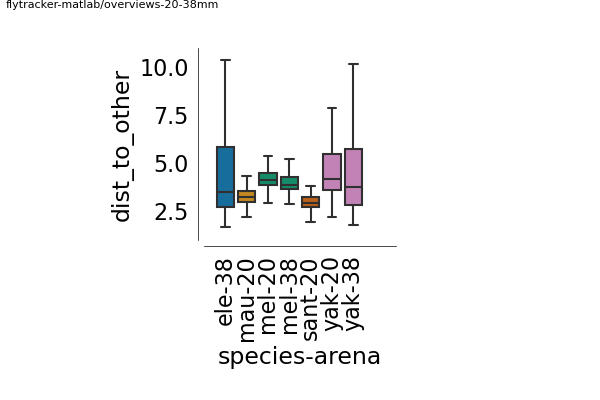

/mnt/minerva/free-behavior-analysis/FlyTracker/figures-all


In [76]:
several_behavs = plotdf[plotdf[plot_behaviors].sum(axis=1)>1].index
yvar='dist_to_other'
# fig, ax = pl.subplots()
fig, ax = pl.subplots()
sns.boxplot(data=plotdf.loc[several_behavs], x='species-arena', y=yvar, ax=ax,
              hue='species', palette=species_palette, fliersize=0,
              order=species_arena_list, width=0.8, dodge=False, whis=1.5)
ax.set_ylim(1, 11)  # most of the data
ax.set_xlim([-1, 8])
sns.despine(offset=4)
ax.tick_params(axis='x', labelrotation=90) 
ax.legend_.remove()
# sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_box_aspect(1)

#ax.set_ylim([1, 8])
pl.subplots_adjust(left=0.1, right=0.9, bottom=0.4)

putil.label_figure(fig, figid)

figname='mat-box_several-behavs_{}'.format(yvar)

# figname='mat-strip_several-behavs_{}'.format(yvar)
# print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
pl.savefig(os.path.join(destdir, '{figname}.svg'.format(figname=figname)))
print(destdir)

In [95]:
# several_behavs = plotdf[plotdf[plot_behaviors].sum(axis=1)>1].index
# yvar='dist_to_other'
# # fig, ax = pl.subplots()
# fig, ax = pl.subplots(2, 1, sharex=True)

# sns.stripplot(data=plotdf.loc[several_behavs], x='species-arena', y=yvar, ax=ax,
#               hue='species', palette=species_palette, 
#               order=species_arena_list, dodge=True, #legend=0, 
#               marker="D", alpha=0.2, s=5)
# sns.pointplot(data=plotdf.loc[several_behavs], x='species-arena', y=yvar,ax=ax,
#               hue='species', palette=species_palette, estimator='median',
#               order=species_arena_list, dodge=True,join=False,
#               markers='_', scale=2)
# ax.set_box_aspect(1)
# # zoom-in / limit the view to different portions of the data
# # ax1.set_ylim(15, 25)  # outliers only
# # ax2.set_ylim(1, 7)  # most of the data

# ax.tick_params(axis='x', labelrotation=45) 
# ax.legend_.remove()
# # sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
# #ax.set_box_aspect(1)

# #ax.set_ylim([1, 8])
# pl.subplots_adjust(left=0.1, right=0.9, bottom=0.2)
# putil.label_figure(fig, figid)
# # figname='mat-strip_several-behavs_{}'.format(yvar)
# # print(figname)
# # pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
# # print(destdir)

<IPython.core.display.Javascript object>


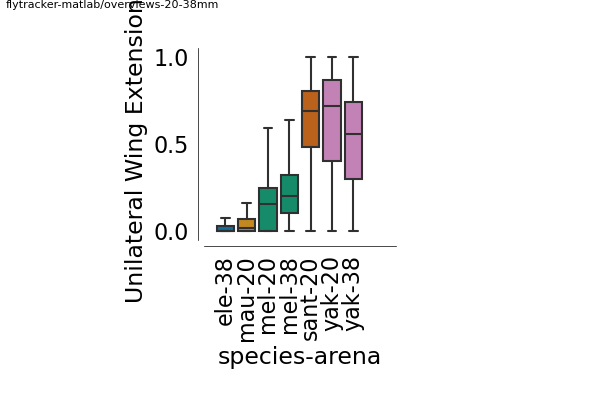

/mnt/minerva/free-behavior-analysis/FlyTracker/figures-all


In [79]:
several_behavs = plotdf[plotdf[plot_behaviors].sum(axis=1)>1].index
yvar='Unilateral Wing Extensions'
# fig, ax = pl.subplots()
fig, ax = pl.subplots()
sns.boxplot(data=plotdf[plotdf['Chasing']>0], x='species-arena', y=yvar, ax=ax,
              hue='species', palette=species_palette, fliersize=0,
              order=species_arena_list, width=0.8, dodge=False, whis=1.5)
# ax.set_ylim(1, 15)  # most of the data
ax.set_xlim([-1, 8])
sns.despine(offset=4)
ax.tick_params(axis='x', labelrotation=90) 
ax.legend_.remove()
# sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_box_aspect(1)

#ax.set_ylim([1, 8])
pl.subplots_adjust(left=0.1, right=0.9, bottom=0.4)

putil.label_figure(fig, figid)

figname='mat-box_several-behavs_{}'.format(yvar)

# figname='mat-strip_several-behavs_{}'.format(yvar)
# print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
pl.savefig(os.path.join(destdir, '{figname}.svg'.format(figname=figname)))
print(destdir)

<IPython.core.display.Javascript object>


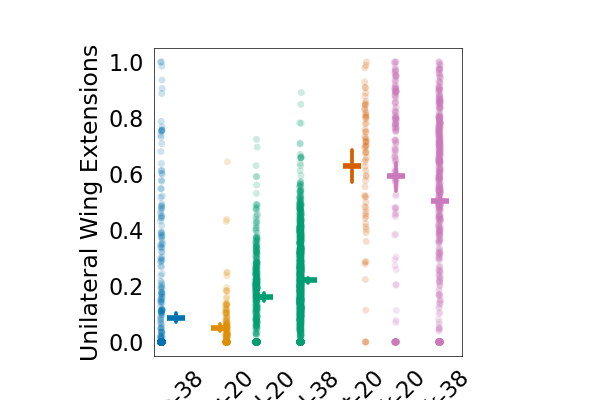

In [84]:
yvar='dist_to_other'
fig, ax = pl.subplots()

sns.stripplot(data=plotdf[(plotdf['Chasing']>0)], 
              x='species-arena', y='Unilateral Wing Extensions',
              order=species_arena_list,
              hue='species', palette=species_palette, dodge=True, #legend=0,
              marker="o", alpha=0.2, s=5)
sns.pointplot(data=plotdf[plotdf['Chasing']>0], 
              x='species-arena', y='Unilateral Wing Extensions', 
              order=species_arena_list,
              hue='species', palette=species_palette, join=False,
             markers='_', scale=2)
ax.tick_params(axis='x', labelrotation=45) 
ax.legend_.remove()
# sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_box_aspect(1)

<IPython.core.display.Javascript object>


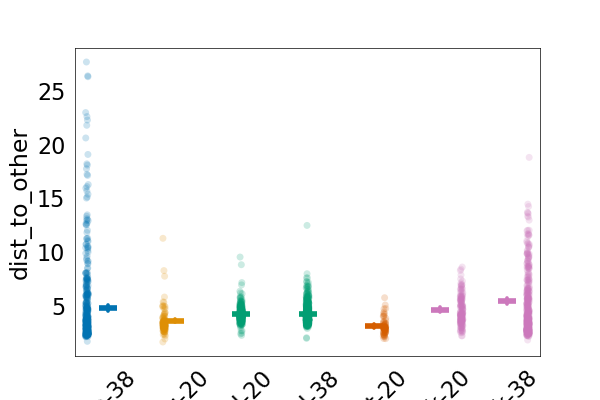

In [93]:
yvar='dist_to_other'
fig, ax = pl.subplots()

sns.stripplot(data=plotdf.loc[several_behavs],
              x='species-arena', y=yvar,
              order=species_arena_list,
              hue='species', palette=species_palette, dodge=True, #legend=0,
              marker="o", alpha=0.2, s=5)
sns.pointplot(data=plotdf[plotdf['Chasing']>0], 
              x='species-arena', y=yvar,
              order=species_arena_list,
              hue='species', palette=species_palette, join=False,
             markers='_', scale=2)
ax.tick_params(axis='x', labelrotation=45) 
ax.legend_.remove()

## get female info

In [15]:
del events0

In [16]:
curr_assay = '38mm_dyad'

In [17]:
ftdir = os.path.join( rootdir, 'free-behavior-analysis/FlyTracker')
#basedir = '/mnt/minerva/analysis/FlyTracker'
# matlab_src = '/home/julianarhee/Documents/projects/flytracker-analysis/overviews2/Ddata.mat'

matlab_src = os.path.join(ftdir, 'flytracker-matlab/overviews-%s/Ddata.mat' % curr_assay)

In [18]:
fpath_sp={}
for fp, df_ in events0.groupby('acquisition'):
    fpath_sp.update({fp: df_['species'].unique()[0]})

NameError: name 'events0' is not defined

In [19]:
behavior_names = ['All Wing Extensions', 'Putative Tap Events', 'Chasing', 
                      'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting']

In [ ]:
trk_fpath = os.path.join(ftdir, curr_assay, 'trk.pkl')
trk_ = pd.read_pickle(trk_fpath) # encoding='latin1')
trk_['chamber'] = curr_assay
# COMBINE male events w. TRK
matlab_src = os.path.join(ftdir, 'flytracker-matlab/overviews-%s/Ddata.mat' % curr_assay)
print(matlab_src)
f_events = util.load_binary_evs_from_mat(matlab_src, feat=trk_, sex='f',
                                       behavior_names=behavior_names)
f_events['species'] = [fpath_sp[v] for v in f_events['acquisition']]

f_events['chamber'] = curr_assay

/mnt/minerva/free-behavior-analysis/FlyTracker/flytracker-matlab/overviews-38mm_dyad/Ddata.mat
elegans 20231213-1103_fly1_eleWT_5do_sh_eleWT_5do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231213-1122_fly2_eleWT_5do_sh_eleWT_5do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231213-1154_fly3_eleWT_6do_sh_eleWT_5do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231213-1212_fly5_eleWT_5do_sh_eleWT_5do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231214-1020_fly1_eleWT_3do_sh_eleWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231214-1051_fly2_eleWT_3do_sh_eleWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231214-1127_fly3_eleWT_3do_sh_eleWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231215-1045_fly1_eleWT_4do_sh_eleWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231222-1113_fly1_eleWT_4do_sh_eleWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231222-1149_fly2_eleWT_4do_sh_eleWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231222-1231_fly3_eleWT_4do_sh_eleWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231223-1117_fly1_eleWT_5do_sh_eleWT_5do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231223-1136_fly2_eleWT_5do_sh_eleWT_5do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231223-1212_fly3_eleWT_5do_sh_eleWT_5do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231226-1112_fly1_eleWT_4do_sh_eleWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231226-1137_fly2_eleWT_4do_sh_eleWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231227-1120_fly1_eleWT_5do_sh_eleWT_5do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231227-1207_fly2_eleWT_5do_sh_eleWT_5do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20231227-1251_fly3_eleWT_5do_sh_eleWT_5do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20240105-1007_fly1_eleWT_3do_sh_eleWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20240105-1018_fly3_eleWT_3do_sh_eleWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20240105-1102_fly4_eleWT_3do_sh_eleWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


elegans 20240109-1348_fly2_eleWT_4do_sh_eleWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240112-1030-fly2-melWT_3do_sh_melWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240115-1015-fly1-melWT_3do_sh_melWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240115-1100-fly2-melWT_3do_sh_melWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240118-1130-fly1-melWT_3do_sh_melWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240118-1415-fly2-melWT_3do_sh_melWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240118-1425-fly3-melWT_3do_sh_melWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240119-1020-fly3-melWT_4do_sh_melWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240119-1107-fly4-melWT_4do_sh_melWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240119-1149-fly5-melWT_4do_sh_melWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240126-0940-fly1-melWT_4do_sh_melWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240126-1023-fly2-melWT_4do_sh_melWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240126-1046-fly3-melWT_4do_sh_melWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240126-1108-fly4-melWT_4do_sh_melWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240126-1122-fly5-melWT_4do_sh_melWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


melanogaster 20240129-1213-fly1-melWT_3do_sh_melWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20191114-1322_fly1_yakWT_3do_AO


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20191114-1608_fly4_yakWT_3do_AO


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20191115-1157_fly2_yakWT_4do_AO


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240109-1435_fly3_yakWT_4do_sh_yakWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240109-1545_fly4_yakWT_4do_sh_yakWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240112-1420-fly3-yakWT_3do_sh_yakWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240112-1500-fly4-yakWT_3do_sh_yakWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240116-1015-fly1-yakWT_4do_sh_yakWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240116-1100-fly2-yakWT_4do_sh_yakWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240116-1500-fly3-yakWT_4do_sh_yakWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240116-1523-fly4-yakWT_4do_sh_yakWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240116-1601-fly5-yakWT_4do_sh_yakWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240119-0932-fly1-yakWT_4do_sh_yakWT_4do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240119-0953-fly2-yakWT_3do_sh_yakWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240119-1420-fly6-yakWT_3do_sh_yakWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240119-1517-fly7-yakWT_3do_sh_yakWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240122-1050-fly1-yakWT_3do_sh_yakWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240122-1105-fly2-yakWT_3do_sh_yakWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240122-1148-fly3-yakWT_3do_sh_yakWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240122-1442-fly4-yakWT_3do_sh_yakWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240125-0956-fly1-yakWT_3do_sh_yakWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240125-1030-fly2-yakWT_3do_sh_yakWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240125-1050-fly3-yakWT_3do_sh_yakWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


yakuba 20240125-1203-fly5-yakWT_3do_sh_yakWT_3do_gh


/home/julianarhee/Repositories/flytracker/utils.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_['Orienting Only'].loc[ori_only.index] = 1


In [8]:
feat_fpath = os.path.join(ftdir, curr_assay, 'feat.pkl')
feat_ = pd.read_pickle(feat_fpath) # encoding='latin1')
feat_['chamber'] = curr_assay

NameError: name 'ftdir' is not defined

In [ ]:
importlib.reload(util)

In [2]:
c_list=[]
for acq, df_ in f_events.groupby('acquisition'):
    ev_ = feat_[(feat_['acquisition']==acq) ].copy()
    ixs = ev_[ (ev_['facing_angle']<=np.deg2rad(45) )]['index']
    currd = df_[(df_['index'].isin(ixs)) & (df_['All Wing Extensions']>0)]
    c_list.append(currd)  
oris = pd.concat(c_list)
oris['species'].unique()

NameError: name 'f_events' is not defined

In [1]:
fig, axn = pl.subplots(1, len(species_list))

for ai, (sp, df_) in enumerate(oris[oris['species'].isin(species_list)].groupby('species')):
    ax=axn[ai]
    ax.set_title(sp)
    ax.hist(df_['ori'])

NameError: name 'pl' is not defined

<IPython.core.display.Javascript object>


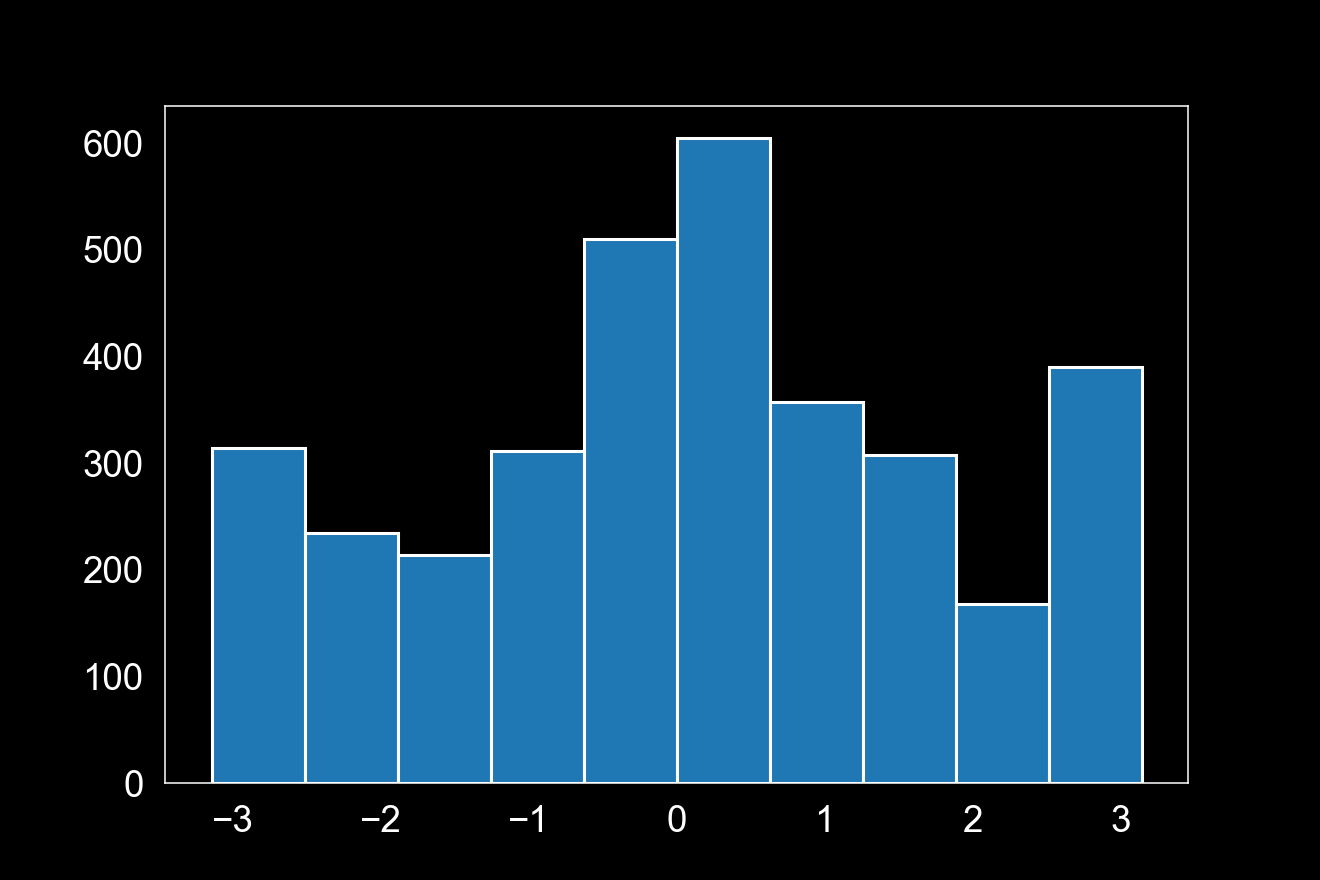

(array([314., 235., 214., 311., 510., 605., 357., 308., 168., 390.]),
 array([-3.14093328e+00, -2.51289384e+00, -1.88485441e+00, -1.25681497e+00,
        -6.28775534e-01, -7.36096885e-04,  6.27303340e-01,  1.25534278e+00,
         1.88338221e+00,  2.51142165e+00,  3.13946109e+00]),
 <BarContainer object of 10 artists>)

In [294]:

ax.hist(currd['ori'])

In [287]:
ixs

Index([632755, 632756, 632757, 632758, 632759, 632760, 632761, 632762, 632763,
       632764,
       ...
       652256, 652257, 652258, 652259, 652260, 652261, 652262, 652263, 652264,
       652265],
      dtype='int64', length=3412)

In [ ]:
flydf['ctr_x'] = flydf['pos_x'] - frame_width/2
flydf['trans_x'] = flydf['ctr_x'] - flydf['ctr_x']

In [161]:
plotdf['facing_angle'].min(), plotdf['facing_angle'].max()

(0.0035062788673888494, 3.1361326834504326)

<IPython.core.display.Javascript object>


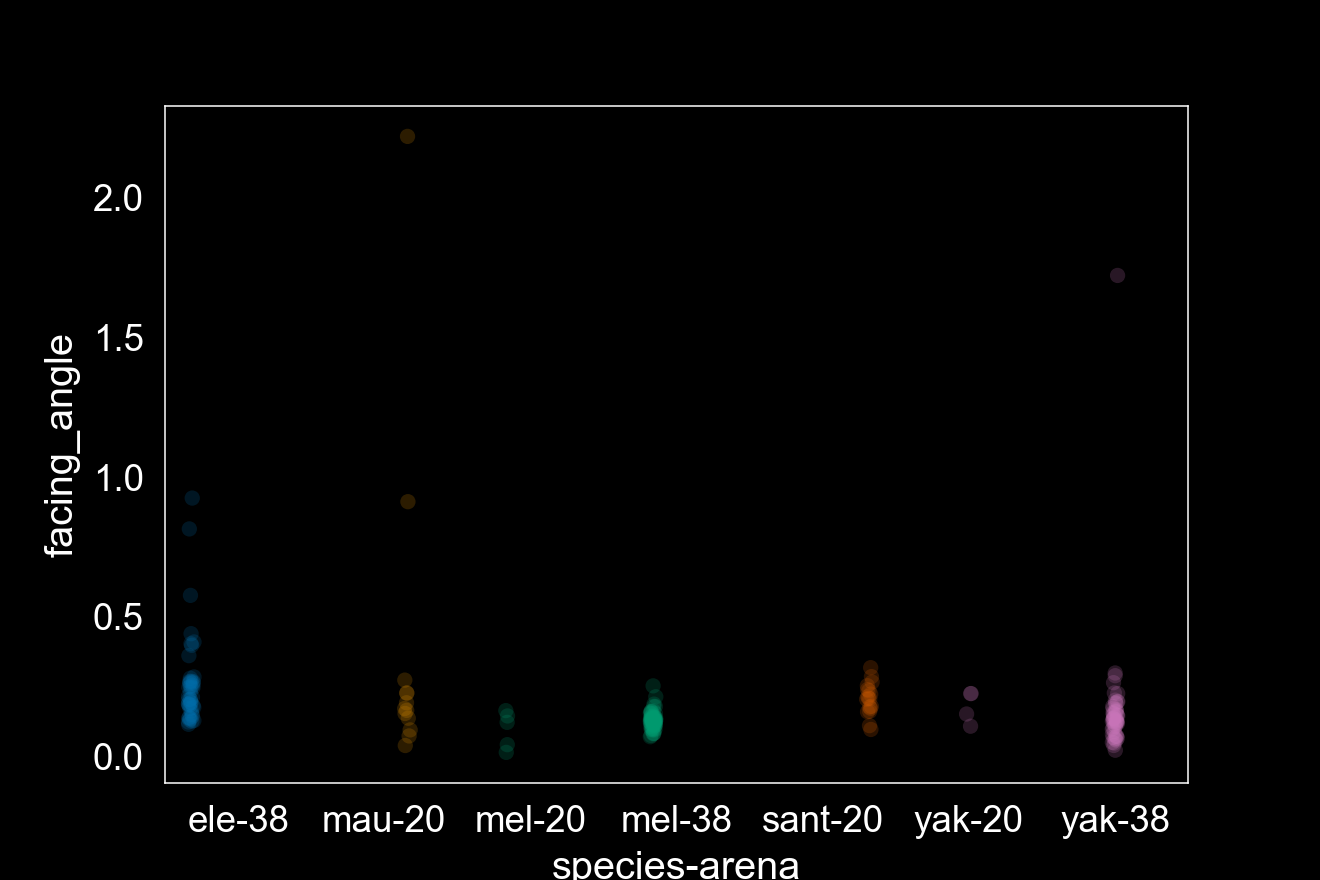

<Axes: xlabel='species-arena', ylabel='facing_angle'>

In [162]:
fig, ax= pl.subplots() #subplot_kw={'projection': 'polar'})
sns.stripplot(data=plotdf[(plotdf['Bilateral Wing Extensions']>0)], ax=ax,
              x='species-arena', y='facing_angle',
              order=species_arena_list,
              hue='species', palette=species_palette, dodge=True, legend=0,
              marker="o", alpha=0.2, s=5)

In [28]:
importlib.reload(util)

<module 'utils' from '/Users/julianarhee/Repositories/flytracker-analysis/utils.py'>

# Plot 

In [29]:
behavior_names = ['All Wing Extensions', 'Putative Tap Events', 'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting']
for b in behavior_names:
    print(b, events[events['Disengaged']==1][b].unique())
nonorienting_names = [b for b in behavior_names if b!='Orienting']
print(nonorienting_names)

All Wing Extensions [0.]
Putative Tap Events [0.]
Chasing [0.]
Licking/Proboscis Ext [0.]
Copulation Attempts [0.]
Orienting [0.]
['All Wing Extensions', 'Putative Tap Events', 'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts']


In [30]:
nonorienting_names

['All Wing Extensions',
 'Putative Tap Events',
 'Chasing',
 'Licking/Proboscis Ext',
 'Copulation Attempts']

## when singing, how close or far?

In [31]:
ongoing_var = 'All Wing Extensions'
yvar = 'leg_dist'

In [32]:
#oriented = events[events['Orienting']==1]
orientedonly = events[events[nonorienting_names].eq(0).all(1)]
orientedonly.shape

(566451, 41)

#### When oriented only, what is the facing angle

In [33]:
%matplotlib notebook

<IPython.core.display.Javascript object>


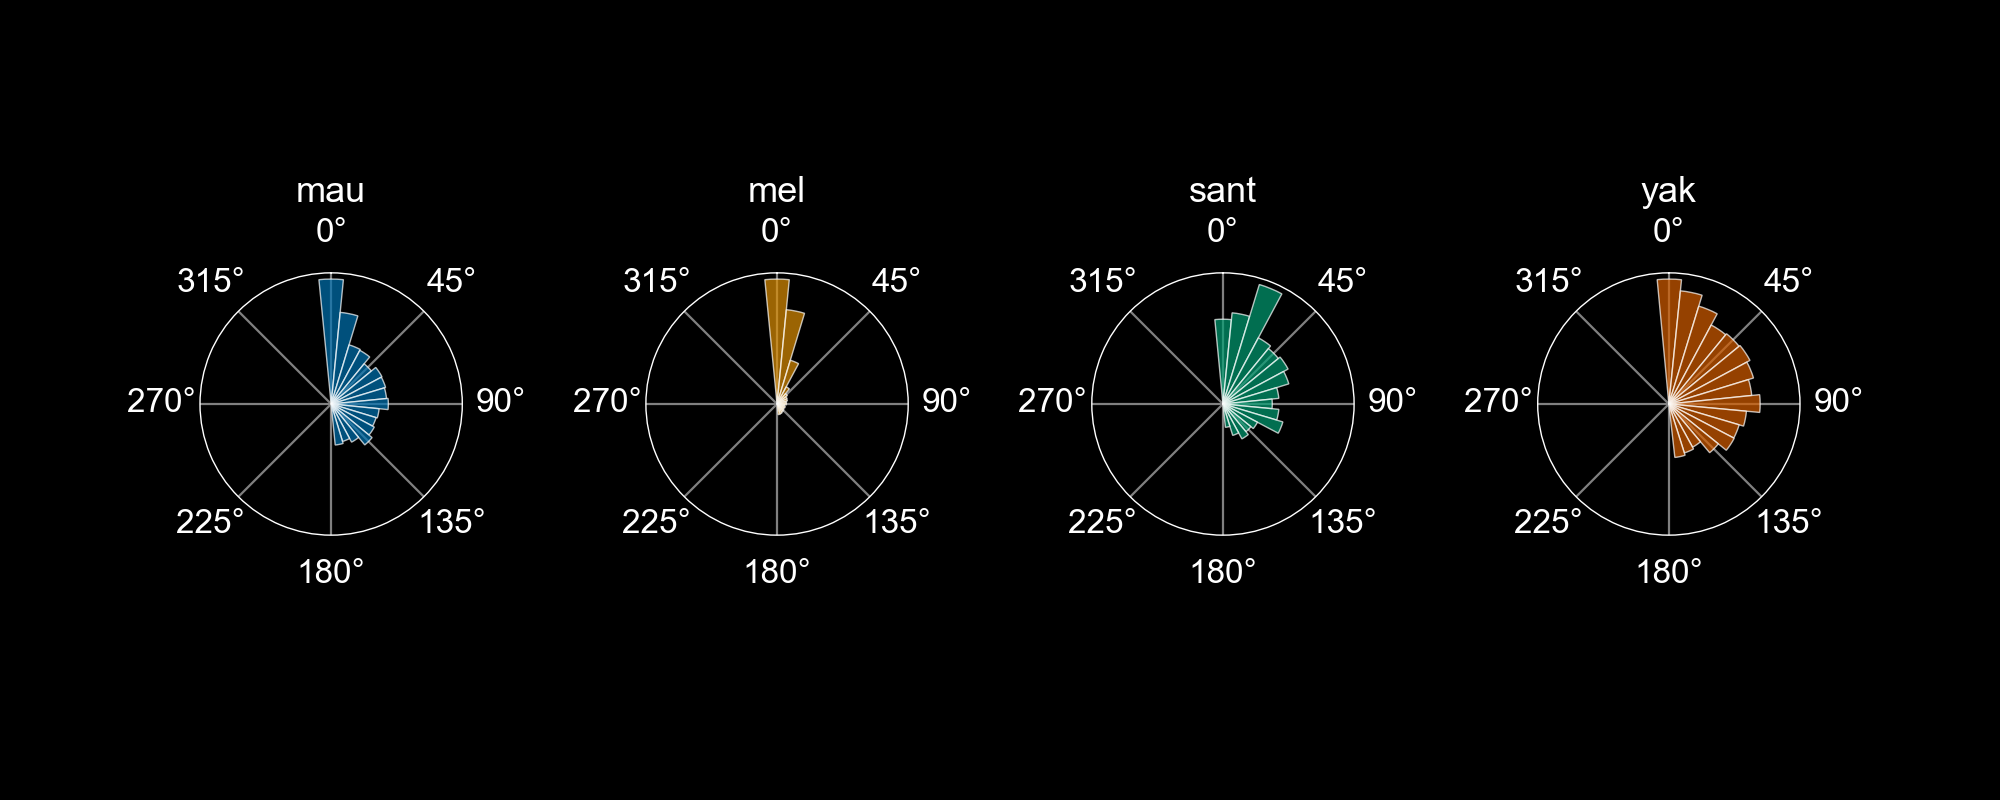

In [39]:
yvar = 'facing_angle' #'dist_to_other'

curr_species = orientedonly[orientedonly['copulation']]['species'].unique()
species_colors = sns.color_palette('colorblind', n_colors=len(curr_species))

fig, axn = pl.subplots(1, len(curr_species), subplot_kw={'projection': 'polar'},
                       figsize=(10,4))
for ai, (col, (sp, df_)) in enumerate(zip(species_colors, \
                        orientedonly[orientedonly['copulation']].groupby('species'))):
    ax=axn[ai]
    thetas = df_['facing_angle'].values
    putil.circular_hist(ax, thetas, facecolor=col)
    #ax.hist(thetas)
    ax.set_title(sp)
pl.subplots_adjust(wspace=0.7, left=0.1, right=0.9)



In [42]:
boutdurs.columns

Index(['species', 'acquisition', 'Disengaged', 'copulation', 'level_4',
       'boutnum', 'boutdur', 'All Wing Extensions', 'Putative Tap Events',
       'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting',
       'vel', 'ang_vel', 'mean_wing_length', 'axis_ratio', 'fg_body_ratio',
       'contrast', 'dist_to_wall', 'dist_to_other', 'leg_dist', 'level_3',
       'min_wing_ang', 'max_wing_ang', 'angle_between', 'facing_angle'],
      dtype='object')

In [49]:
curracq = '20220128-1516_mauR4_4do_gh'
plotdf = boutdurs[boutdurs['acquisition']==curracq].copy()

#fig, ax =pl.subplots()
sns.jointplot(data=plotdf, x='boutdur', y='leg_dist', #ax=ax,
               kind='scatter', hue='All Wing Extensions', palette='viridis')

In [51]:
%matplotlib notebook
pl.figure()

In [51]:
events = events0[events0['species'].isin(curr_species)].copy()

# HISTs: Plot a given variable for each species 

<IPython.core.display.Javascript object>


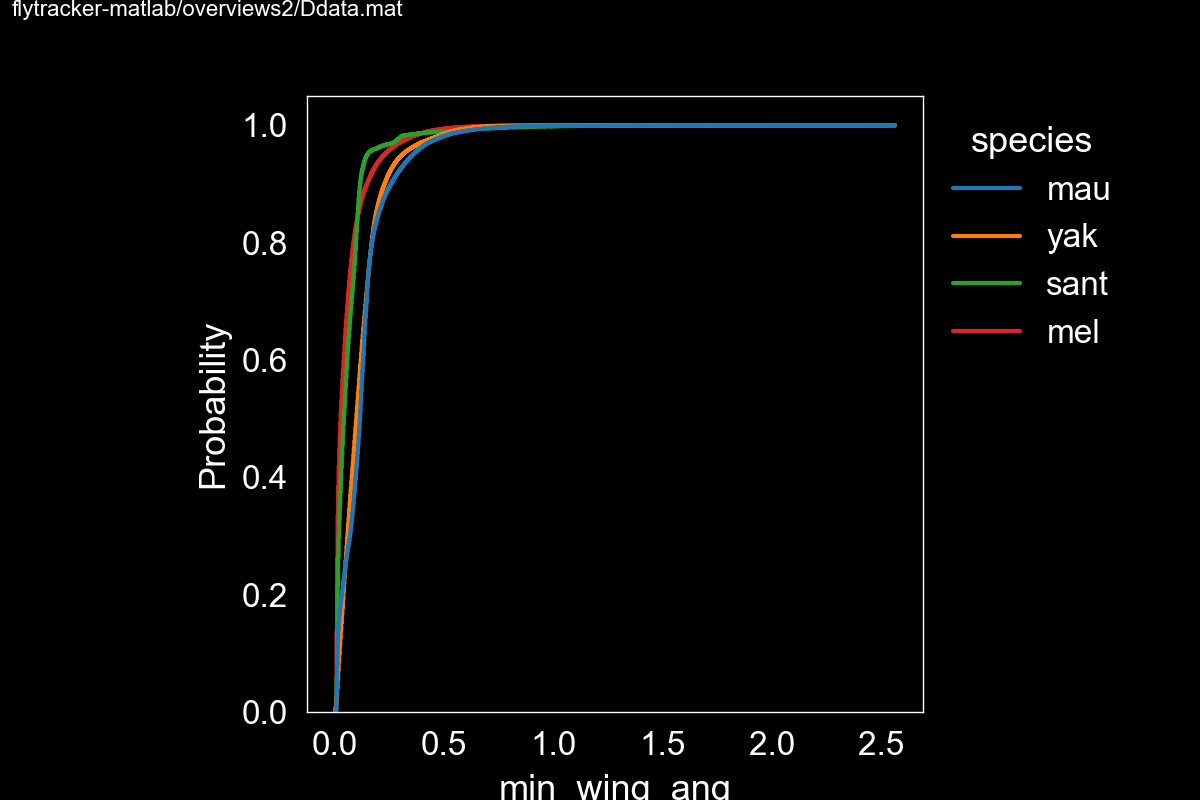

/Volumes/Julie/analysis/FlyTracker/figures


<IPython.core.display.Javascript object>


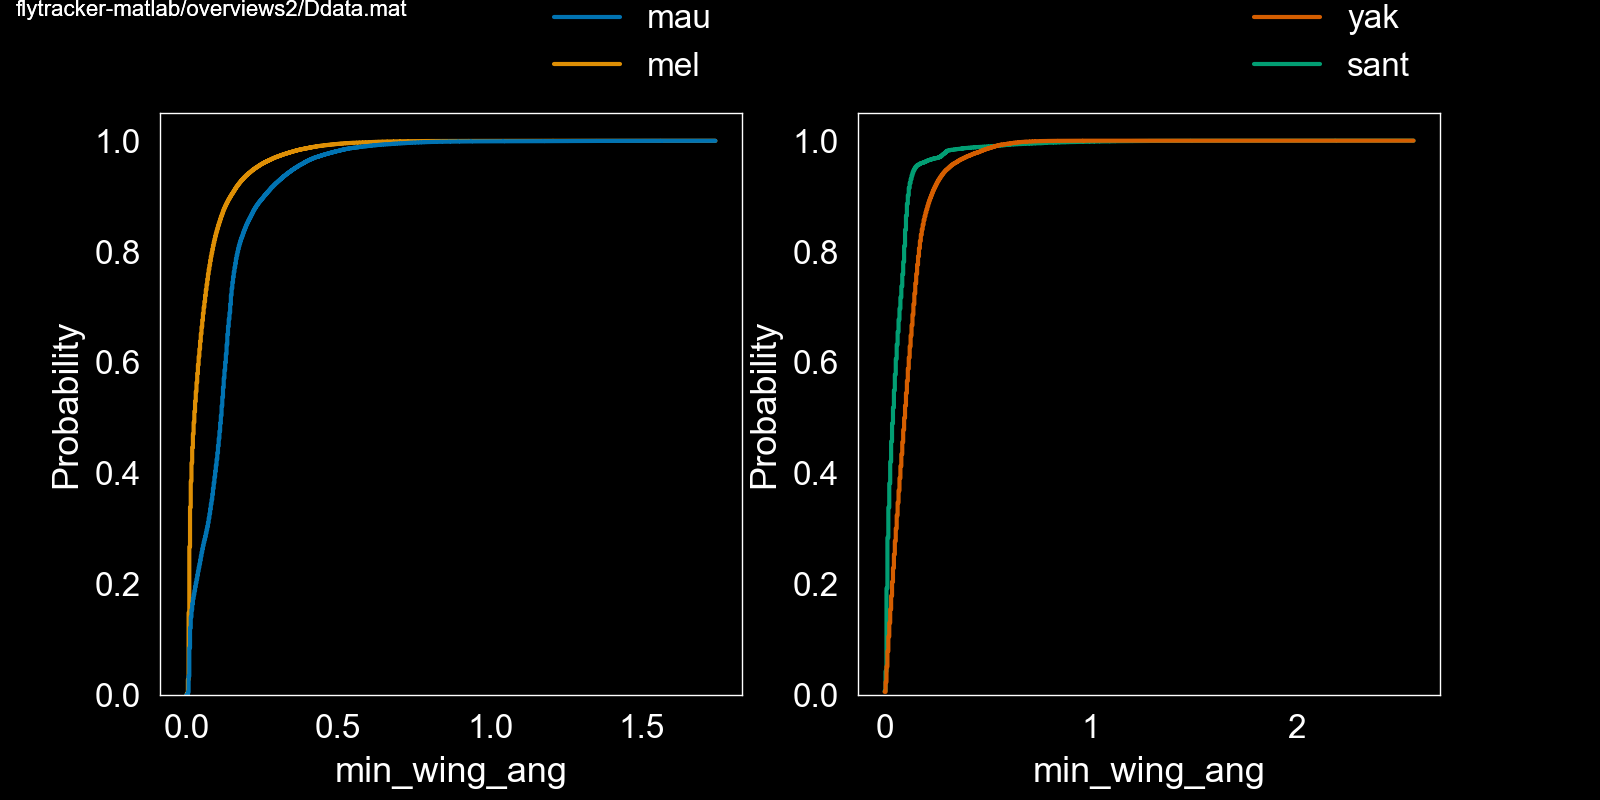

mat_min_wing_ang_cum-by-species_mau-mel
/Volumes/Julie/analysis/FlyTracker/figures
mat_min_wing_ang_cum-by-species_yak-sant
/Volumes/Julie/analysis/FlyTracker/figures


In [53]:
fig, ax = pl.subplots()
# yvar = 'dist_to_other' #'dist_to_other'
yvar = 'min_wing_ang'
sns.histplot(data=events[ (events['copulation']) & (events['Disengaged']==0)], 
             x=yvar, hue='species', ax=ax, 
             cumulative=True, common_norm=False, stat='probability', element='step', fill=False)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_box_aspect(1)
putil.label_figure(fig, figid)
pl.savefig(os.path.join(destdir, \
            '{figname}.png'.format(figname='mat_{}_cum-by-species_enga-and-cop'.format(yvar))))
print(destdir)

fig, axn = pl.subplots(1, 2, figsize=(8,4))
group1 = ['mau', 'mel']
group2 = ['yak', 'sant']
for ai, group in enumerate([group1, group2]):
    ax=axn[ai]
    plotdf_ =events[ (events['copulation']) & (events['Disengaged']==0) & (events['species'].isin(group))]
    sns.histplot(data=plotdf_, x=yvar, hue='species', ax=ax, 
                 cumulative=True, common_norm=False, stat='probability', 
                 element='step', fill=False, palette=species_palette)
    sns.move_legend(ax, loc='lower right', bbox_to_anchor=(1,1), frameon=False)
    ax.set_box_aspect(1)
    putil.label_figure(fig, figid)
    figname = 'mat_{}_cum-by-species_{}'.format(yvar, '-'.join(group))
    print(figname)
    pl.savefig(os.path.join(destdir, \
                '{figname}.png'.format(figname=figname)))
    print(destdir)
pl.subplots_adjust(left=0.1, right=0.9)

In [349]:
events[(events['Disengaged']==0) & (events['copulation'])].groupby('species')['dist_to_other'].median()

species
mau     3.395455
mel     3.992214
sant    2.810362
yak     3.631469
Name: dist_to_other, dtype: float64

# bout duration

In [54]:
bouts = bouts0[bouts0['species'].isin(curr_species)].copy()

<IPython.core.display.Javascript object>


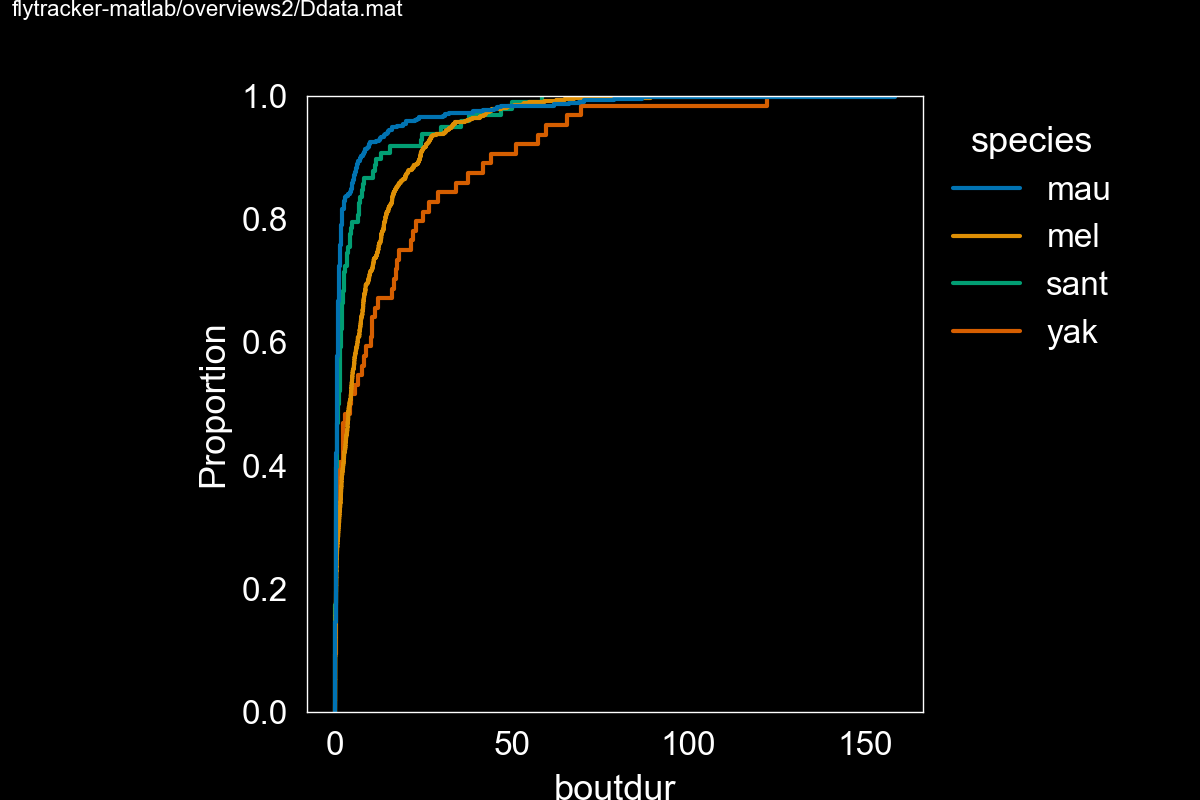

/Volumes/Julie/analysis/FlyTracker/figures


In [494]:
yvar = 'boutdur'
fig, ax = pl.subplots()
sns.ecdfplot(data=bouts[(bouts['copulation']) & (bouts['Disengaged']==0)],
             x=yvar, hue='species', ax=ax, #bins=100,
             stat='proportion',
            palette=species_palette)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_box_aspect(1)

putil.label_figure(fig, figid)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname='mat_boutdur_ECDF-by-species')))
print(destdir)

<IPython.core.display.Javascript object>


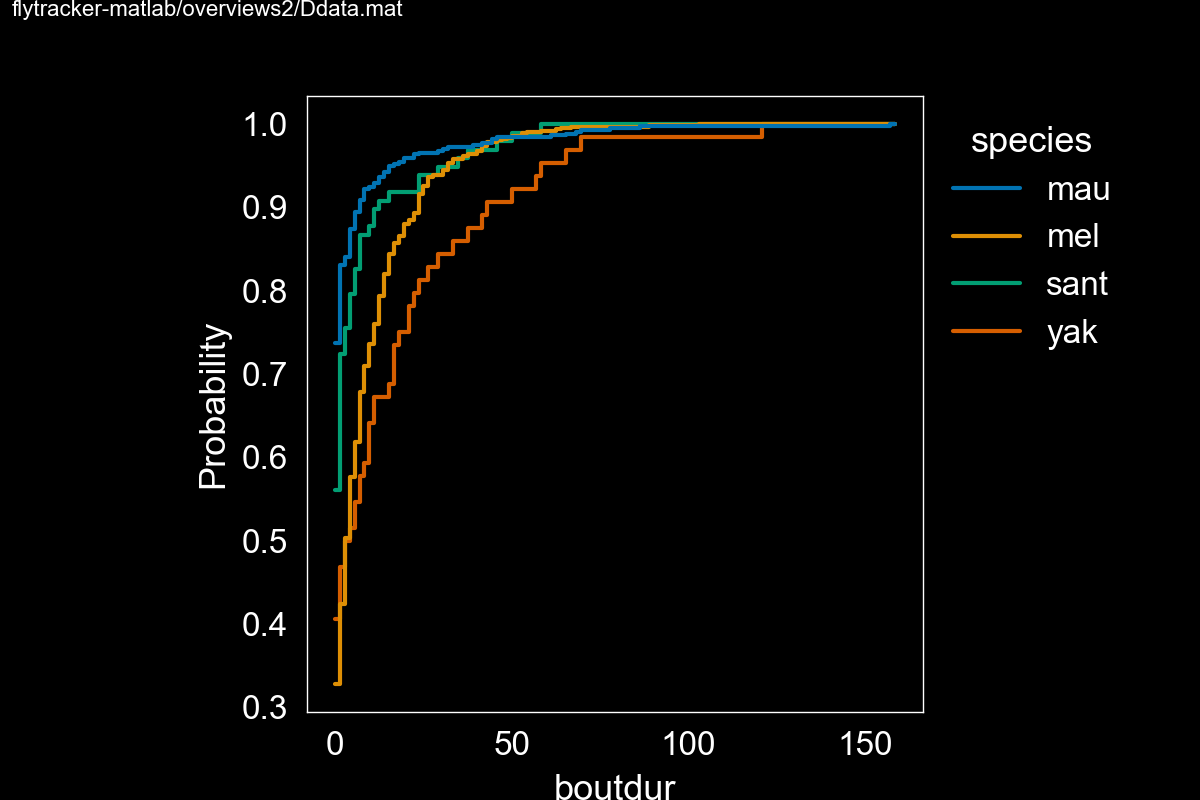

/Volumes/Julie/analysis/FlyTracker/figures


<IPython.core.display.Javascript object>


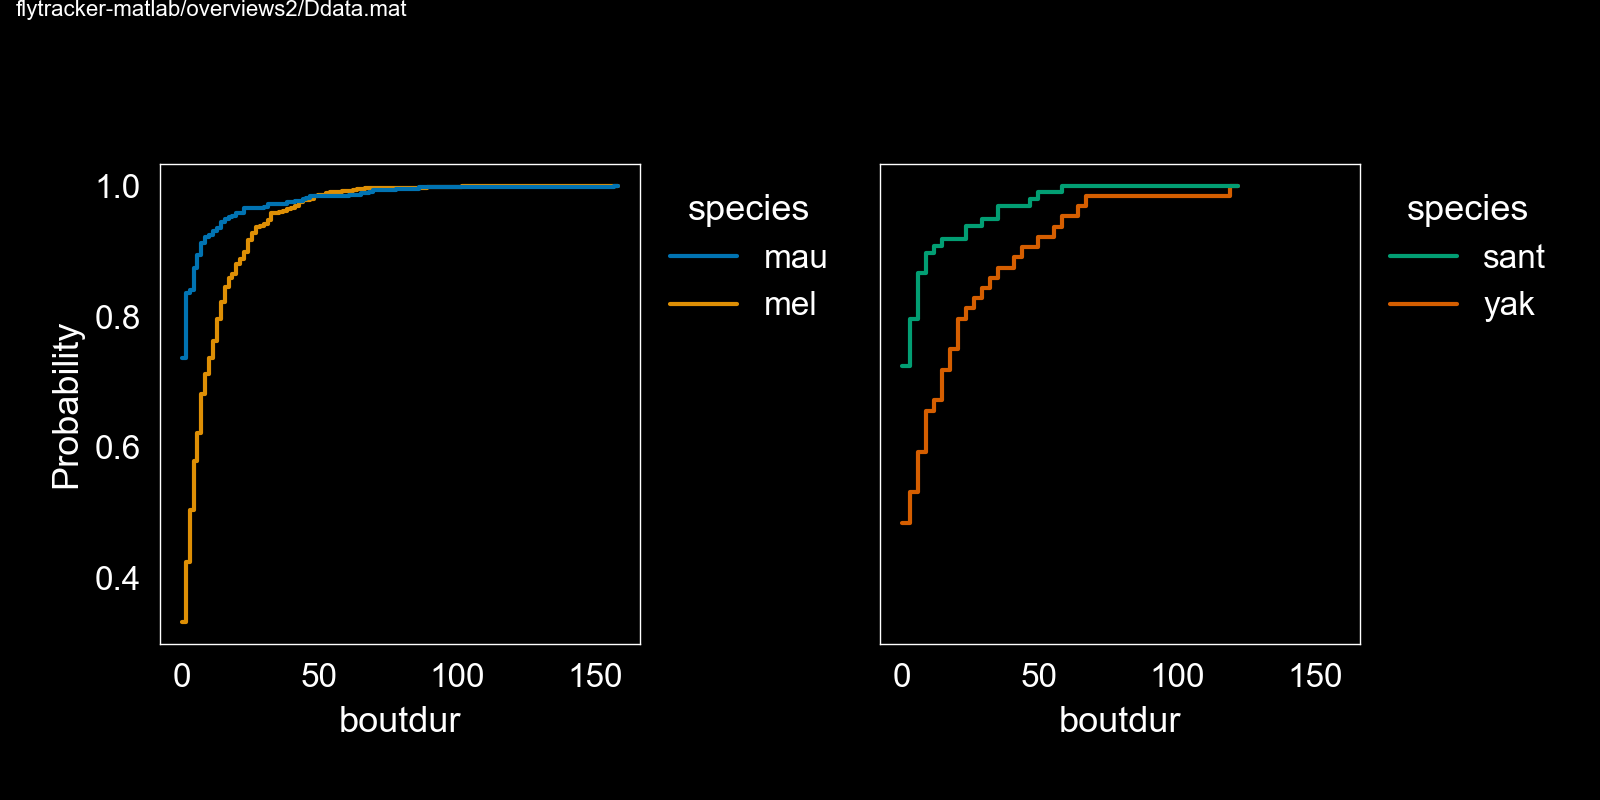

mat_boutdur_cum-by-species_split-sisters
/Volumes/Julie/analysis/FlyTracker/figures


In [491]:
yvar = 'boutdur'
fig, ax = pl.subplots()
sns.histplot(data=bouts[(bouts['copulation']) & (bouts['Disengaged']==0)], 
             x=yvar, hue='species', ax=ax, 
             cumulative=True, common_norm=False, stat='probability', element='step', kde=False, fill=False,
            palette=species_palette)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_box_aspect(1)

putil.label_figure(fig, figid)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname='mat_boutdur_cum-by-species')))
print(destdir)

# Split into paired sister species
fig, axn = pl.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)
group1 = ['mau', 'mel']
group2 = ['yak', 'sant']
for ai, group in enumerate([group1, group2]):
    ax=axn[ai]
    plotdf_ =bouts[ (bouts['copulation']) & (bouts['Disengaged']==0) & (bouts['species'].isin(group))]
    sns.histplot(data=plotdf_, x=yvar, hue='species', ax=ax, palette=species_palette,
                 cumulative=True, common_norm=False, stat='probability', element='step', 
                 fill=False)
    sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
    ax.set_box_aspect(1)
pl.subplots_adjust(left=0.1, right=0.85, wspace=0.5)
putil.label_figure(fig, figid)
figname = 'mat_{}_cum-by-species_split-sisters'.format(yvar)
print(figname)
pl.savefig(os.path.join(destdir, \
            '{figname}.png'.format(figname=figname)))
print(destdir)


In [56]:
bouts['boutdur_log'] = np.log10(bouts['boutdur'])
bouts['boutdur_log'].replace([np.inf, -np.inf], np.nan, inplace=True)
bouts[yvar].mean()

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


5.082251432843258

<IPython.core.display.Javascript object>


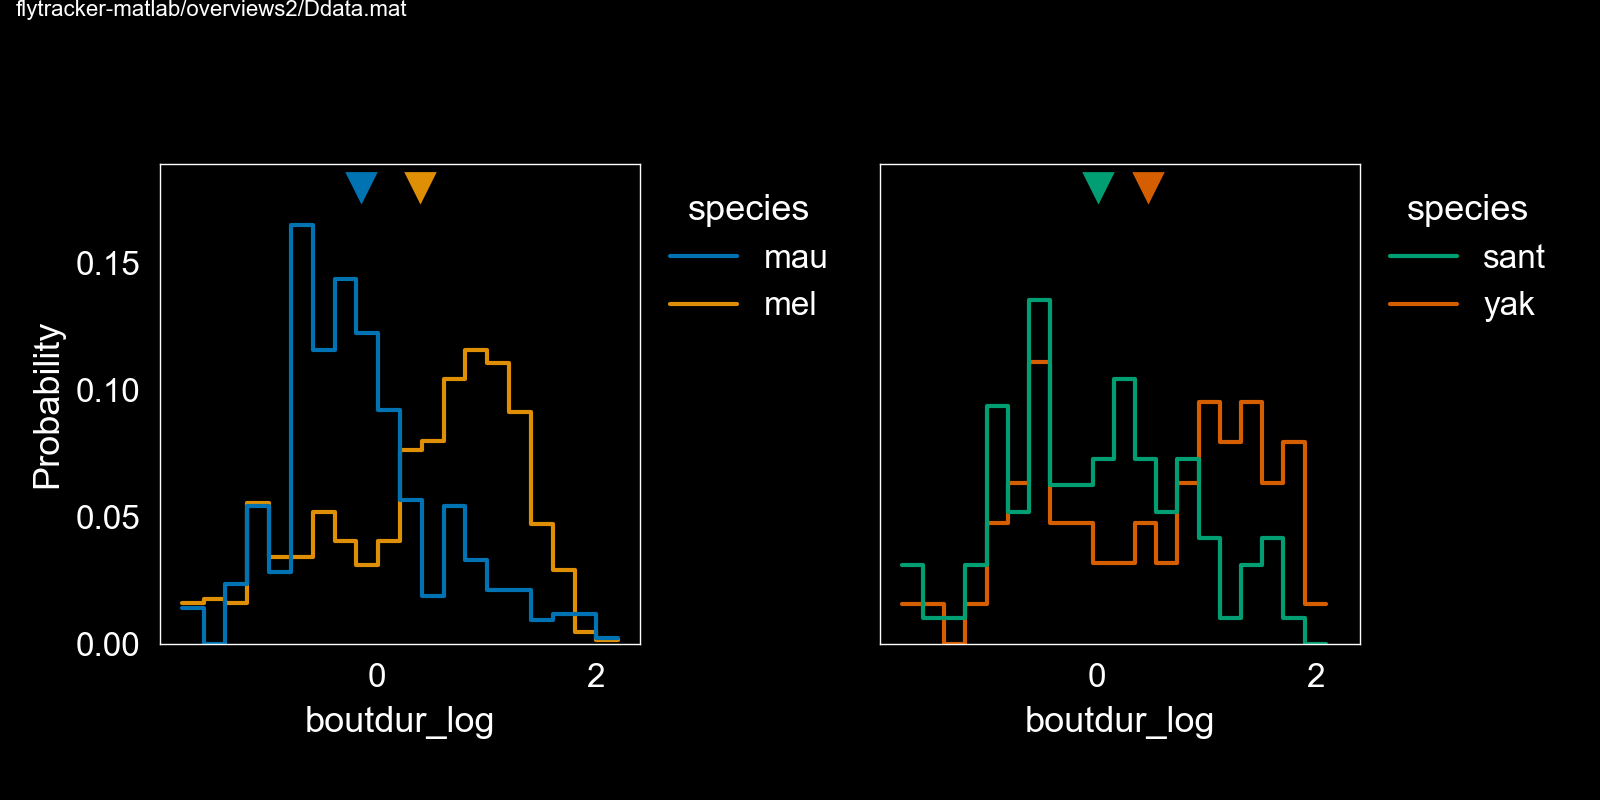

mat_boutdur_log_cum-by-species_split-sisters
/Volumes/Julie/analysis/FlyTracker/figures


In [57]:
yvar = 'boutdur_log'
# Split into paired sister species
fig, axn = pl.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)
group1 = ['mau', 'mel']
group2 = ['yak', 'sant']
for ai, group in enumerate([group1, group2]):
    ax=axn[ai]
    plotdf_ =bouts[(bouts['copulation']) & (bouts['Disengaged']==0) & (bouts['species'].isin(group))]
    sns.histplot(data=plotdf_, x=yvar, hue='species', ax=ax, palette=species_palette, bins=20,
                 cumulative=False, common_norm=False, stat='probability', element='step', fill=False)
    sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
    ax.set_box_aspect(1)
    for sp, df_ in plotdf_.groupby('species'):
        ax.plot(df_[yvar].mean(), 0.18, color=species_palette[sp],
               marker='v', markersize=10)
pl.subplots_adjust(left=0.1, right=0.85, wspace=0.5)
putil.label_figure(fig, figid)
figname = 'mat_{}_cum-by-species_split-sisters'.format(yvar)
print(figname)
pl.savefig(os.path.join(destdir, \
            '{figname}.png'.format(figname=figname)))
print(destdir)


In [508]:
behavior_names
behavior_ordered = ['Orienting Only', 'Chasing', 'Putative Tap Events',
                    'Unilateral Wing Extensions', 'Licking/Proboscis Ext', 
                    'Copulation Attempts']
#assert len(behavior_ordered)==len(behavior_names)
for behav in behavior_ordered:
    bouts['{}_log'.format(behav)] = np.log2(bouts[behav])
    bouts['{}_log'.format(behav)].replace([np.inf, -np.inf], np.nan, inplace=True)

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [509]:
plotdf = bouts[(bouts['copulation']) & (bouts['Disengaged']==0)].copy()
print(plotdf.groupby('species')['{}_log'.format(behav)].mean())
#plotdf.replace([np.inf, -np.inf], np.nan, inplace=True)
#plotdf = plotdf.dropna()
print(plotdf.groupby('species')['{}_log'.format(behav)].mean())

species
mau    -3.835557
mel    -6.768791
sant   -3.316075
yak    -6.043576
Name: Copulation Attempts_log, dtype: float64
species
mau    -3.835557
mel    -6.768791
sant   -3.316075
yak    -6.043576
Name: Copulation Attempts_log, dtype: float64


<IPython.core.display.Javascript object>


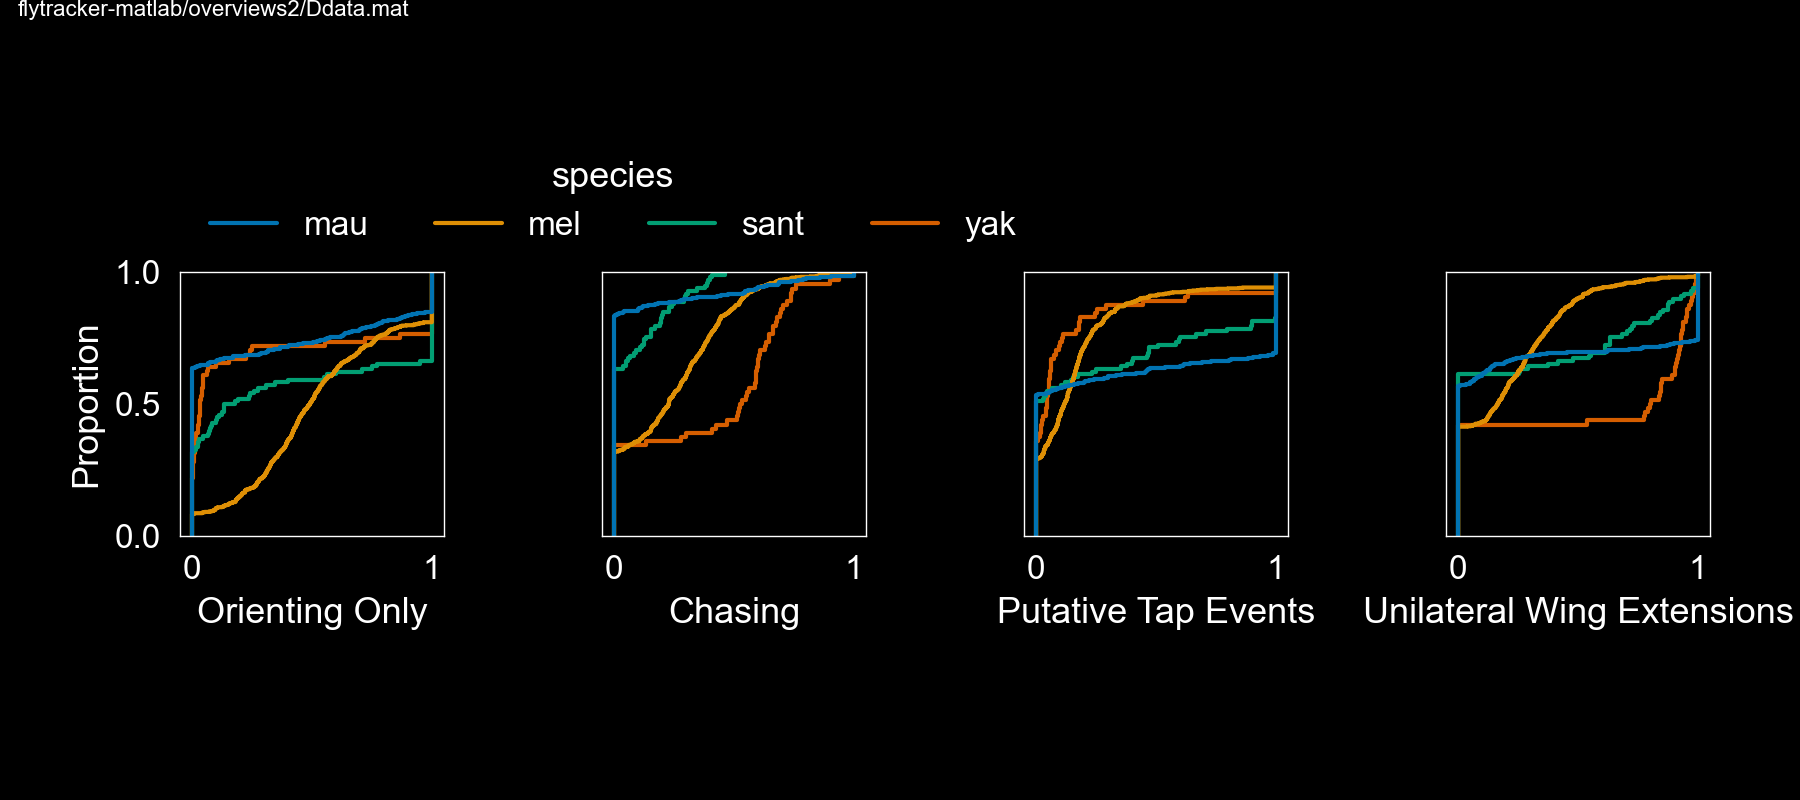

mat_polar-scatter_facing_angle-v-Unilateral Wing Extensions-hue-dist_to_other_engaged


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Julie/analysis/FlyTracker/figures/mat_polar-scatter_facing_angle-v-Unilateral Wing Extensions-hue-dist_to_other_engaged.png'

In [530]:
plotdf = bouts[(bouts['Disengaged']==0) & (bouts['copulation'])]
plot_behavs = behavior_ordered[0:-2]
#fig, axn = pl.subplots(2, int(len(behavior_ordered)/2), figsize=(8,6), sharex=False, sharey=True)
fig, axn = pl.subplots(1, len(plot_behavs), figsize=(9,4), sharex=False, sharey=True)

for ai, behav in enumerate(plot_behavs):
    ax=axn.flat[ai]
    sns.ecdfplot(data=plotdf,
             x='{}'.format(behav), hue='species', ax=ax, #bins=100,
             stat='proportion',
            palette=species_palette)
    ax.set_box_aspect(1)
    if ai==0:
        sns.move_legend(ax, loc='lower left', bbox_to_anchor=(0, 1), ncol=4, frameon=False)
    else:
        ax.legend_.remove()
pl.subplots_adjust(left=0.1, right=0.95, wspace=0.6, hspace=0.3)

putil.label_figure(fig, figid)
#figname='mat_ECDF_frac-behav-in-bout' #.format(xvar, yvar, huevar)
print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
print(destdir)

In [150]:
bouts.columns

Index(['species', 'acquisition', 'Disengaged', 'copulation', 'level_4',
       'boutnum', 'boutdur', 'All Wing Extensions', 'Putative Tap Events',
       'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting',
       'Orienting Only', 'Unilateral Wing Extensions', 'vel', 'ang_vel',
       'mean_wing_length', 'axis_ratio', 'fg_body_ratio', 'contrast',
       'dist_to_wall', 'dist_to_other', 'leg_dist', 'level_3', 'min_wing_ang',
       'max_wing_ang', 'angle_between', 'facing_angle', 'boutdur_log',
       'All Wing Extensions_log', 'Putative Tap Events_log', 'Chasing_log',
       'Licking/Proboscis Ext_log', 'Copulation Attempts_log', 'Orienting_log',
       'Unilateral Wing Extensions_log'],
      dtype='object')

<IPython.core.display.Javascript object>


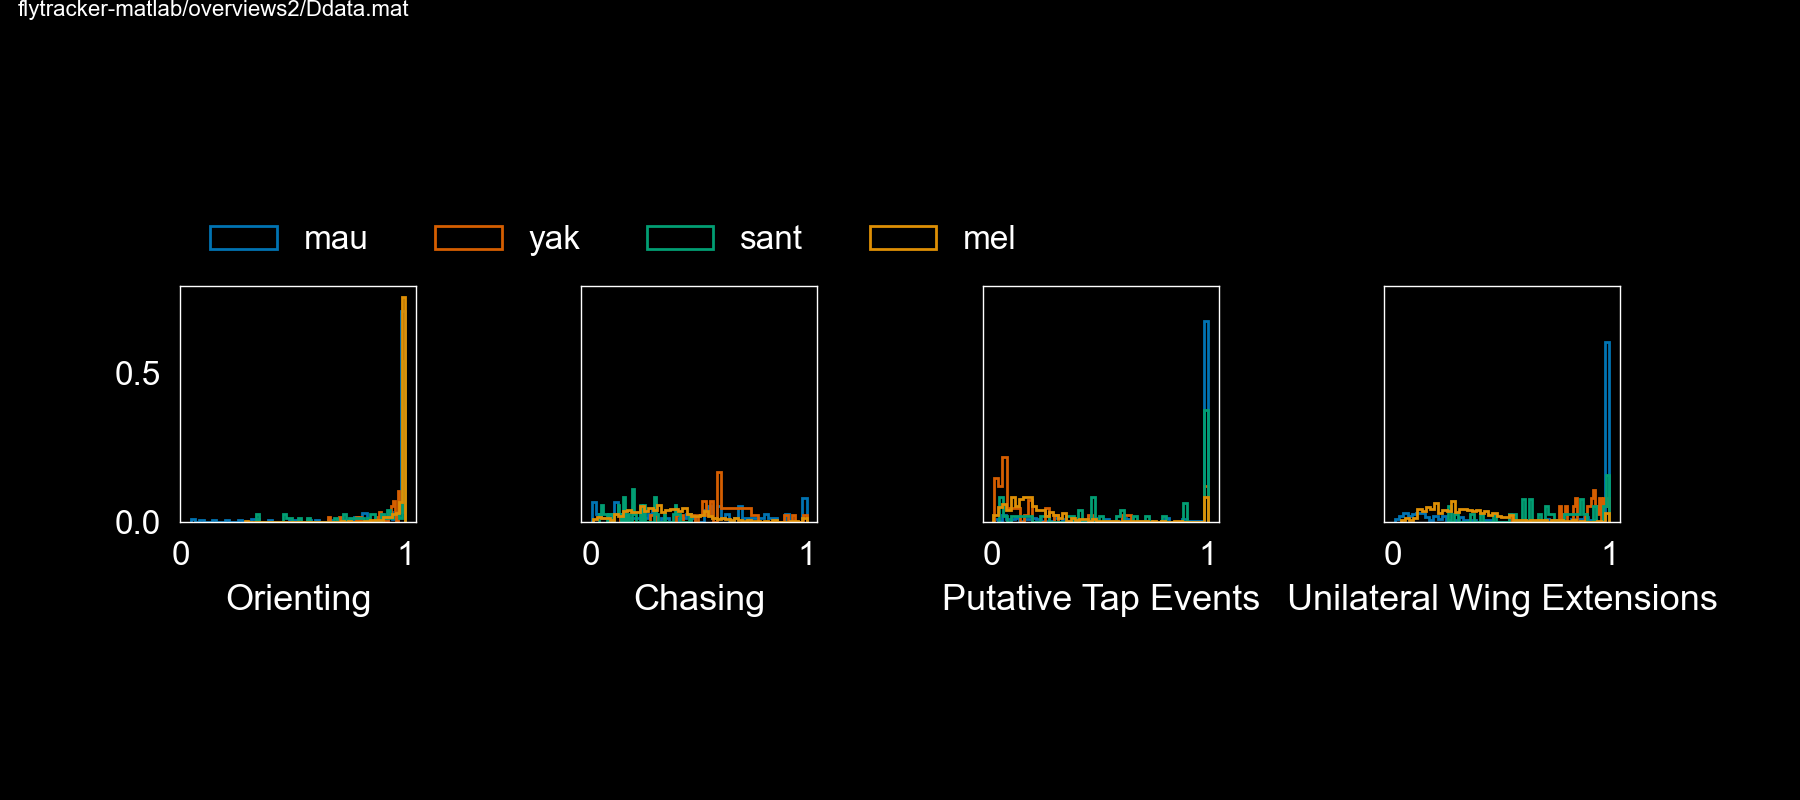

mat_cum-hists_frac-behav-in-bout
/Volumes/Julie/analysis/FlyTracker/figures


In [153]:
plotdf = bouts[(bouts['Disengaged']==0) & (bouts['copulation'])]
#fig, axn = pl.subplots(2, int(len(behavior_ordered)/2), figsize=(8,6), sharex=False, sharey=True)
fig, axn = pl.subplots(1, 4, figsize=(9,4), sharex=False, sharey=True)

for ai, behav in enumerate(behavior_ordered[0:-2]):
    ax=axn.flat[ai]
#     sns.histplot(data=plotdf,
#              x='{}'.format(behav), hue='species', ax=ax, #bins=100,
#              cumulative=True, common_norm=False, stat='probability', element='step', kde=False, fill=False,
#             palette=species_palette)
    for sp in curr_species:
        vals = plotdf[(plotdf['species']==sp) & (plotdf[behav]>0)]['{}'.format(behav)].copy()
        weights = np.ones_like(vals) / len(vals)
        ax.hist(vals, cumulative=False, weights=weights,  label=sp, edgecolor=species_palette[sp],
           alpha=1, fill=False, histtype='step', bins=50) #, stat='probability')
    if ai==0:
#         sns.move_legend(ax, loc='lower left', bbox_to_anchor=(0, 1), ncol=4, frameon=False)
        ax.legend(loc='lower left', bbox_to_anchor=(0, 1), ncol=4, frameon=False)
#     else:
#         ax.legend_.remove()
    ax.set_box_aspect(1)
    ax.set_xlabel(behav)
pl.subplots_adjust(left=0.1, right=0.9, wspace=0.7, hspace=0.3)

putil.label_figure(fig, figid)
figname='mat_cum-hists_frac-behav-in-bout' #.format(xvar, yvar, huevar)
print(figname)
#pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
print(destdir)

<IPython.core.display.Javascript object>


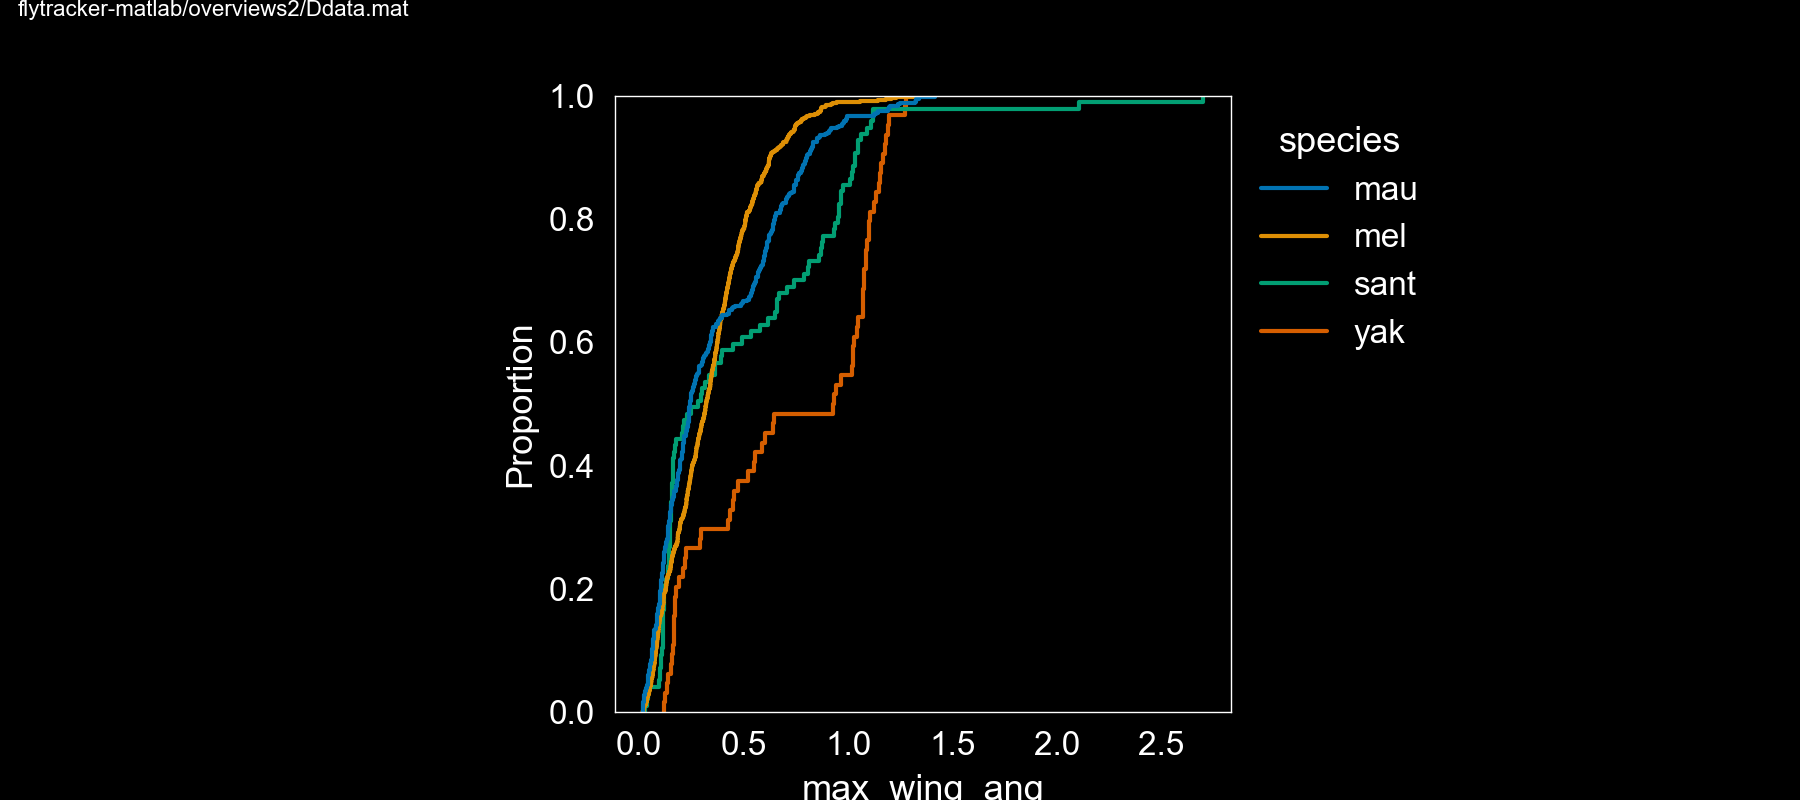

PermissionError: [Errno 13] Permission denied

In [507]:
yvar = 'max_wing_ang'
fig, ax = pl.subplots(figsize=(9,4))
sns.ecdfplot(data=bouts[(bouts['copulation']) & (bouts['Disengaged']==0)],
             x=yvar, hue='species', ax=ax, #bins=100,
             stat='proportion', palette=species_palette)
# sns.histplot(data=bouts[(bouts['Disengaged']==0)],
#              x=yvar, hue='species', ax=ax, cumulative=True, common_norm=False,
#              stat='probability', palette=species_palette, fill=False, element='step')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_box_aspect(1)

putil.label_figure(fig, figid)
pl.savefig(os.path.join(destdir, 
            '{figname}.png'.format(figname='mat_max_wing_ang_ECDF-by-species')), dpi=300)
print(destdir)

# angular metrics

In [327]:
# from basic_units import cos, degrees, radians
def format_radians_label(float_in):
    from fractions import Fraction
    # Converts a float value in radians into a
    # string representation of that float
    numeric_part = Fraction(float_in / (np.pi))
    string_out = str(numeric_part)+"π"
    
    return string_out

<IPython.core.display.Javascript object>


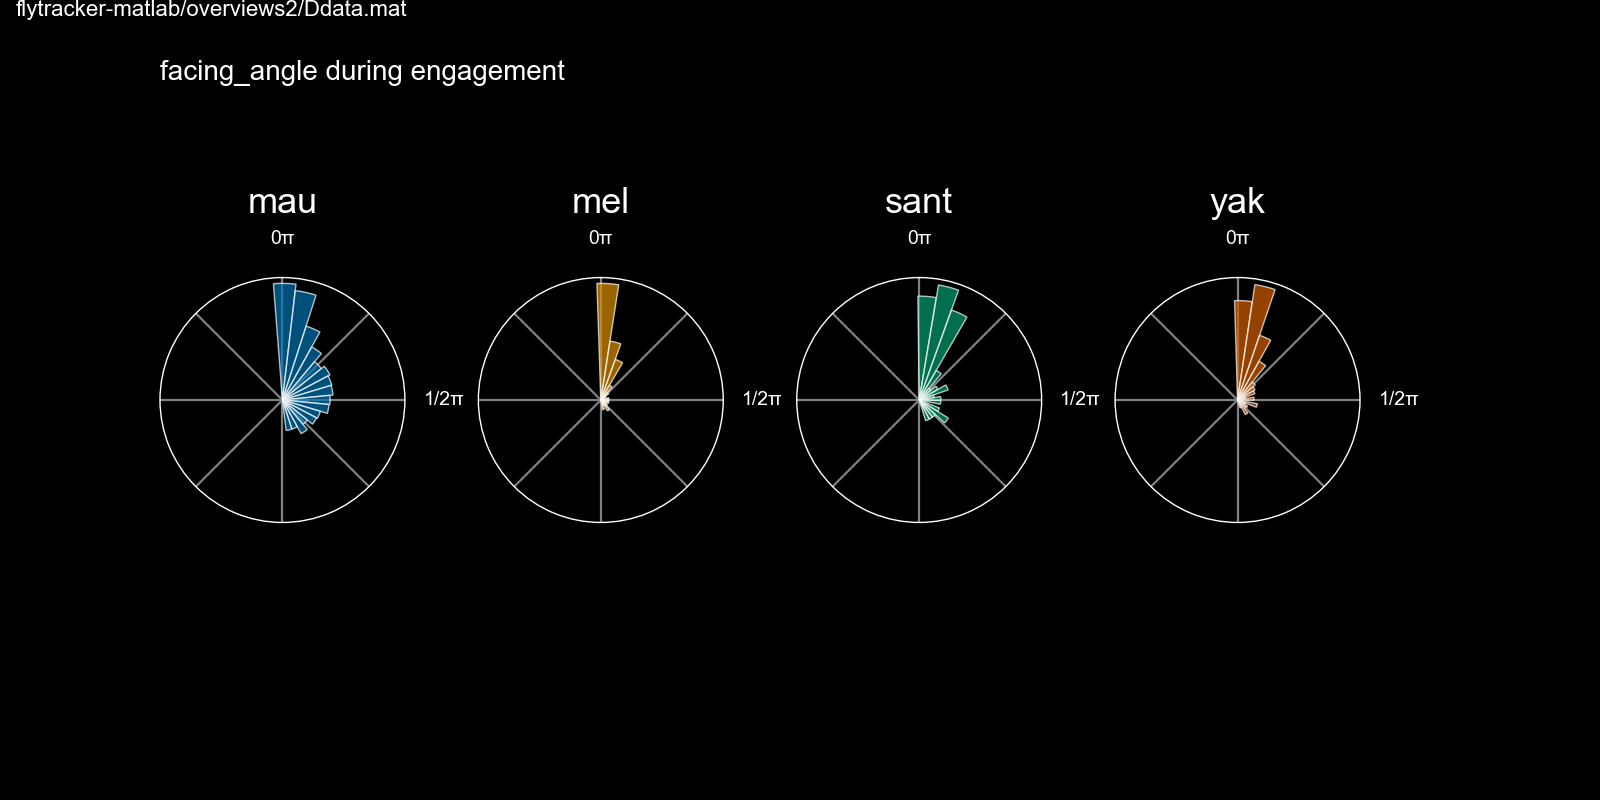

mat_polar-hist_facing_angle_eng


/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_70338/1277400496.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([format_radians_label(0), '', format_radians_label(np.deg2rad(90))], fontsize=7)


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Julie/analysis/FlyTracker/figures/mat_polar-hist_facing_angle_eng.png'

In [523]:
plotdf = bouts[(bouts['species'].isin(curr_species))
               & (bouts['Disengaged']==0)]#
#                & (bouts['copulation'])].copy()

yvar = 'facing_angle'
curr_species = bouts[(bouts['copulation'])]['species'].unique()
fig, axn = pl.subplots(1, len(curr_species), subplot_kw={'projection': 'polar'},
                      sharex=True, sharey=False,  figsize=(8, 4))
for ai, (col, (sp, df_)) in enumerate(zip(species_colors, \
                                          plotdf.groupby('species'))):
    ax=axn[ai]
    thetas = df_[yvar].values
    putil.circular_hist(ax, thetas, facecolor=col)
    ax.set_title(sp)
    #ax.set_yticklabels(['', 1], fontsize=7)
    ax.set_xticklabels([format_radians_label(0), '', format_radians_label(np.deg2rad(90))], fontsize=7)
pl.subplots_adjust(left=0.1, right=0.85, wspace=0.3, top=0.9, bottom=0.1)

fig.text(0.1, 0.9, '{} during engagement'.format(yvar))

putil.label_figure(fig, figid)
figname='mat_polar-hist_{}_eng'.format(yvar)
print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
print(destdir)

In [524]:
boutdurs['boutdur'].min(), boutdurs['boutdur'].max(), boutdurs['boutdur'].median()

NameError: name 'boutdurs' is not defined

<IPython.core.display.Javascript object>


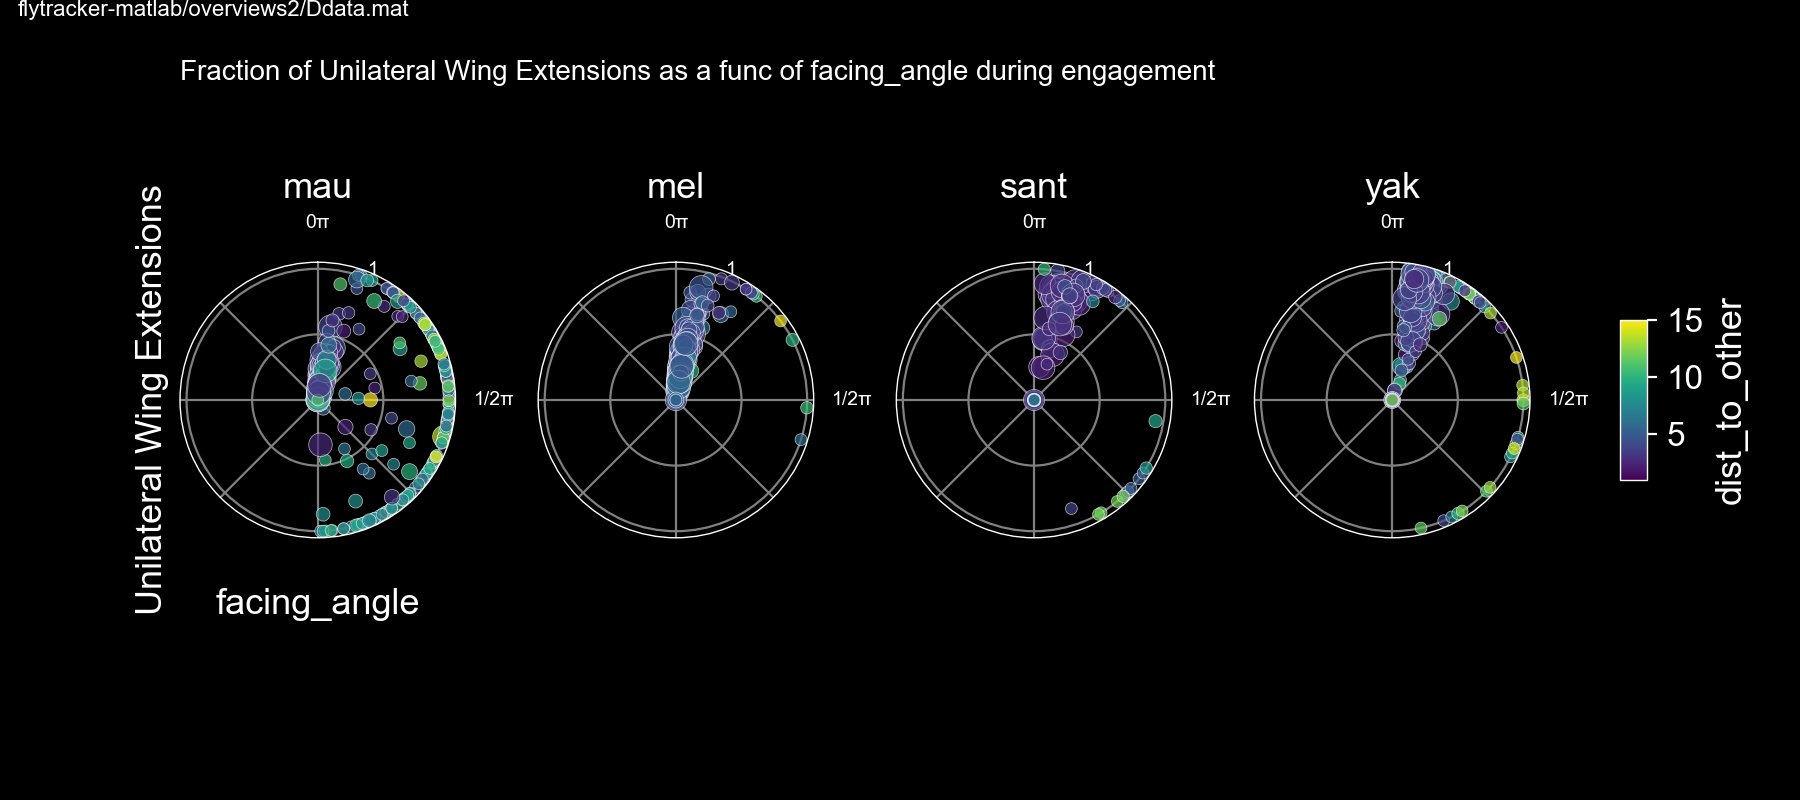

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_70338/407993907.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 1], fontsize=7)
/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_70338/407993907.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([format_radians_label(0), '', format_radians_label(np.deg2rad(90))], fontsize=7)
/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_70338/407993907.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 1], fontsize=7)
/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_70338/407993907.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([format_radians_label(0), '', format_radians_label(np.deg2rad(90))], fontsize=7)
/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_70338/407993907.py:20: Us

mat_polar-scatter_facing_angle-v-Unilateral Wing Extensions-hue-dist_to_other_engaged


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Julie/analysis/FlyTracker/figures/mat_polar-scatter_facing_angle-v-Unilateral Wing Extensions-hue-dist_to_other_engaged.png'

In [528]:
xvar = 'facing_angle'
yvar = 'Unilateral Wing Extensions'
huevar='dist_to_other'
hue_vmin, hue_vmax = 1, 15 #10 #00 #15
hue_cmap = 'viridis'
fig, axn = pl.subplots(1, len(curr_species), subplot_kw={'projection': 'polar'},
                      sharex=True, sharey=False, figsize=(9, 4))
for ai, (col, (sp, df_)) in enumerate(zip(species_colors, \
                                          plotdf.groupby('species'))):
    ax=axn[ai]
    thetas = df_['facing_angle'].values
    sns.scatterplot(data=df_, x=xvar, y=yvar, ax=ax,
                    hue=huevar, palette=hue_cmap, hue_norm=(hue_vmin, hue_vmax),
                   linewidth=0.25, size='boutdur', size_norm=(1, hue_vmax), alpha=0.7)
    ax.legend_.remove()
    ax.set_title(sp)
    if ai != 0:
        ax.set_ylabel('')
        ax.set_xlabel('')
    ax.set_yticklabels(['', 1], fontsize=7)
    ax.set_xticklabels([format_radians_label(0), '', format_radians_label(np.deg2rad(90))], fontsize=7)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)

# Colorbar
cax = fig.add_axes([0.9 ,0.4, 0.015, 0.2])
points = pl.scatter([], [], c=[], vmin=hue_vmin, vmax=hue_vmax, cmap=hue_cmap)
fig.colorbar(points, cax=cax, label=huevar)
pl.subplots_adjust(left=0.1, right=0.85, wspace=0.3, top=0.9, bottom=0.1)

fig.text(0.1, 0.9, 'Fraction of {} as a func of {} during engagement'.format(yvar, xvar))

putil.label_figure(fig, figid)
figname='mat_polar-scatter_{}-v-{}-hue-{}_engaged'.format(xvar, yvar, huevar)
print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
print(destdir)

In [375]:
import matplotlib as mpl

In [381]:
importlib.reload(putil)

<module 'plotting' from '/Users/julianarhee/Repositories/flytracker-analysis/plotting.py'>

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_70338/4032519159.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axn = pl.subplots(1, 4, figsize=(9,4), sharex=True, sharey=True)


<IPython.core.display.Javascript object>


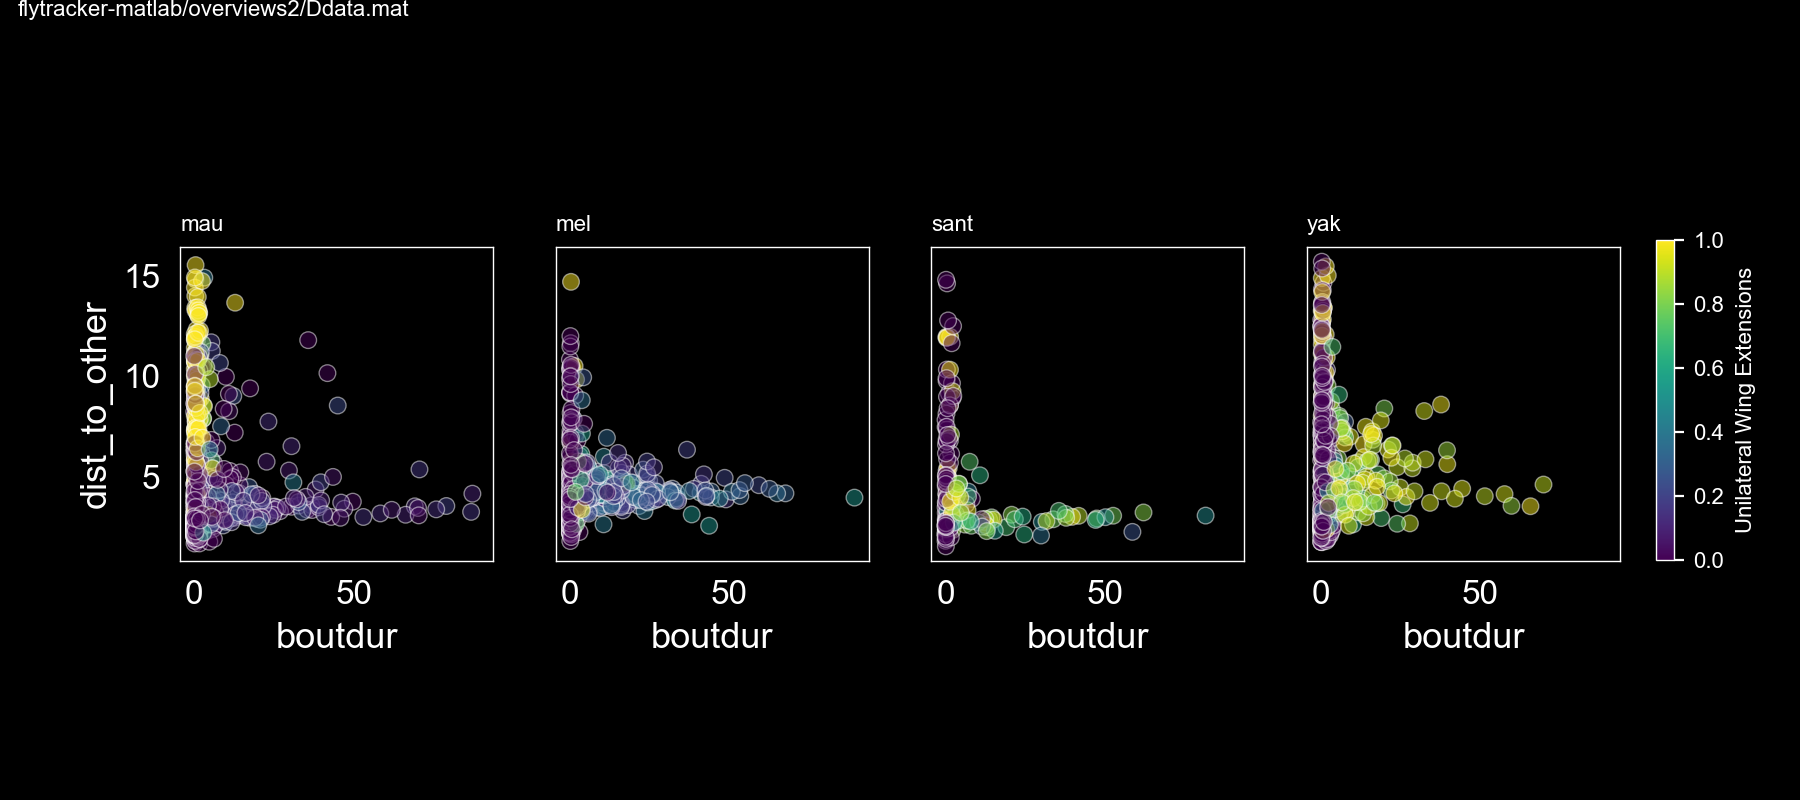

mat_scatter_boutdur-v-dist_to_other-hue-dist_to_other
/Volumes/Julie/analysis/FlyTracker/figures


In [384]:
hue_norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap='viridis'
xvar = 'boutdur'
yvar = 'dist_to_other'
hue_var = 'Unilateral Wing Extensions'

fig, axn = pl.subplots(1, 4, figsize=(9,4), sharex=True, sharey=True)
for ai, (sp, df_) in enumerate(plotdf.groupby('species')):
    ax=axn[ai]
    sns.scatterplot(data=df_[df_['boutdur']<=100], x=xvar, y=yvar,ax=ax,
            hue=hue_var,
            palette=cmap, alpha=0.5, hue_norm=hue_norm, legend=0)
    ax.set_title(sp, loc='left', fontsize=8)
    ax.set_box_aspect(1)
pl.subplots_adjust(left=0.1, right=0.9)
putil.colorbar_from_mappable(ax, hue_norm, cmap, fontsize=8,
                hue_title=hue_var, axes=[0.92, 0.3, 0.01, 0.4]) #pad=0.05):


putil.label_figure(fig, figid)
figname='mat_scatter_{}-v-{}-hue-{}'.format(xvar, yvar, huevar)
print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
print(destdir)

<IPython.core.display.Javascript object>


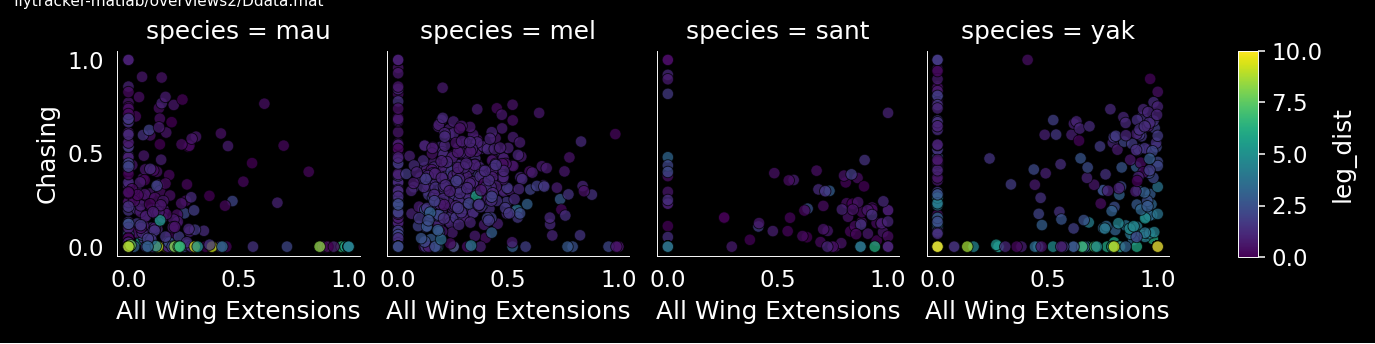

mat_by-species_All Wing Extensions-v-Chasing-hue-leg_dist
/mnt/minerva/analysis/FlyTracker/figures


In [645]:
incl_species = ['mau', 'yak', 'sant', 'mel']
plotdf = boutdurs[(boutdurs['Disengaged']==0) & (boutdurs['species'].isin(incl_species))].copy()

xvar = 'All Wing Extensions'
yvar='Chasing'
huevar='leg_dist'
huelabel = 'bout dur (s)' if huevar=='boutdur' else huevar
vmin, vmax = plotdf[huevar].min(),plotdf[huevar].max()
vmax=10 if huevar=='leg_dist' else 300
norm=pl.Normalize(vmin=vmin, vmax=vmax)
cmap ='viridis'

g = sns.FacetGrid(data=plotdf, col='species', height=2.5, aspect=1)
g = g.map_dataframe(sns.scatterplot, x=xvar, y=yvar, hue=huevar,
               edgecolor='k', palette=cmap, hue_norm=norm, alpha=0.75)
pl.subplots_adjust(right=0.85)

# Colorbar
cax = g.fig.add_axes([0.9 ,0.25, 0.015, 0.6])
# Get a mappable object with the same colormap as the data
points = pl.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)
# Draw the colorbar
g.fig.colorbar(points, cax=cax, label=huelabel)

putil.label_figure(g.fig, figid)
figname='mat_by-species_{}-v-{}-hue-{}'.format(xvar, yvar, huevar)
print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
print(destdir)

## pairplot all behaviors

/home/julianarhee/anaconda3/envs/flytracker/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


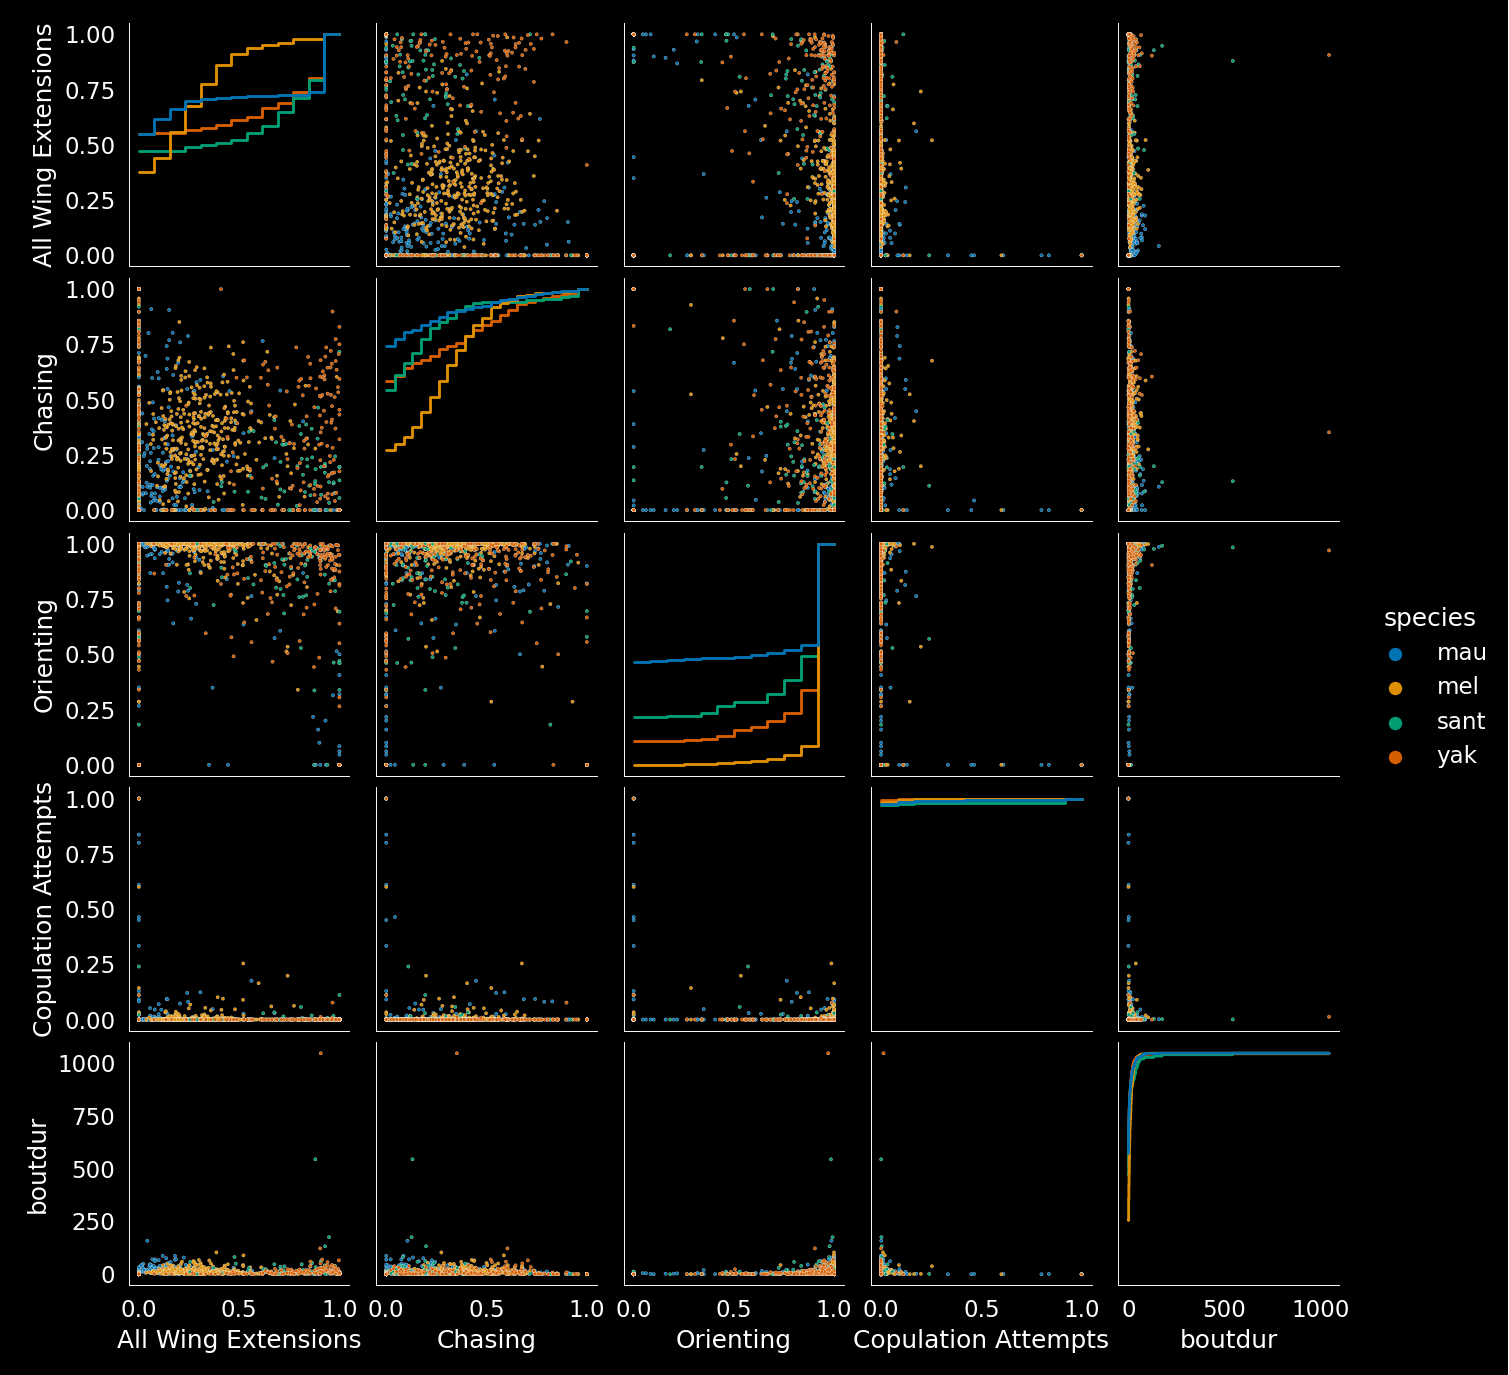

In [651]:
plotdf = boutdurs[(boutdurs['Disengaged']==0) & (boutdurs['species'].isin(incl_species))].copy()

#plot_vars = ['All Wing Extensions', 'Putative Tap Events', 'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting', 'boutdur']
plot_vars = ['All Wing Extensions', 'Chasing', 'Orienting', 'Copulation Attempts', 'boutdur']

incl_species = ['mau', 'yak', 'sant', 'mel']
sns.pairplot(data=plotdf, hue='species', plot_kws={'s': 3}, vars=plot_vars, size=2, 
            diag_kws={'common_norm': False, 'stat': 'probability', 
                      'cumulative': True, 'element': 'step', 'fill': False}, 
            diag_kind='hist', palette=species_cmap)

pl.savefig(os.path.join(destdir, '{}.png'.format('pairplot-all-binary-behavs')))

In [652]:
destdir

'/mnt/minerva/analysis/FlyTracker/figures'

<IPython.core.display.Javascript object>


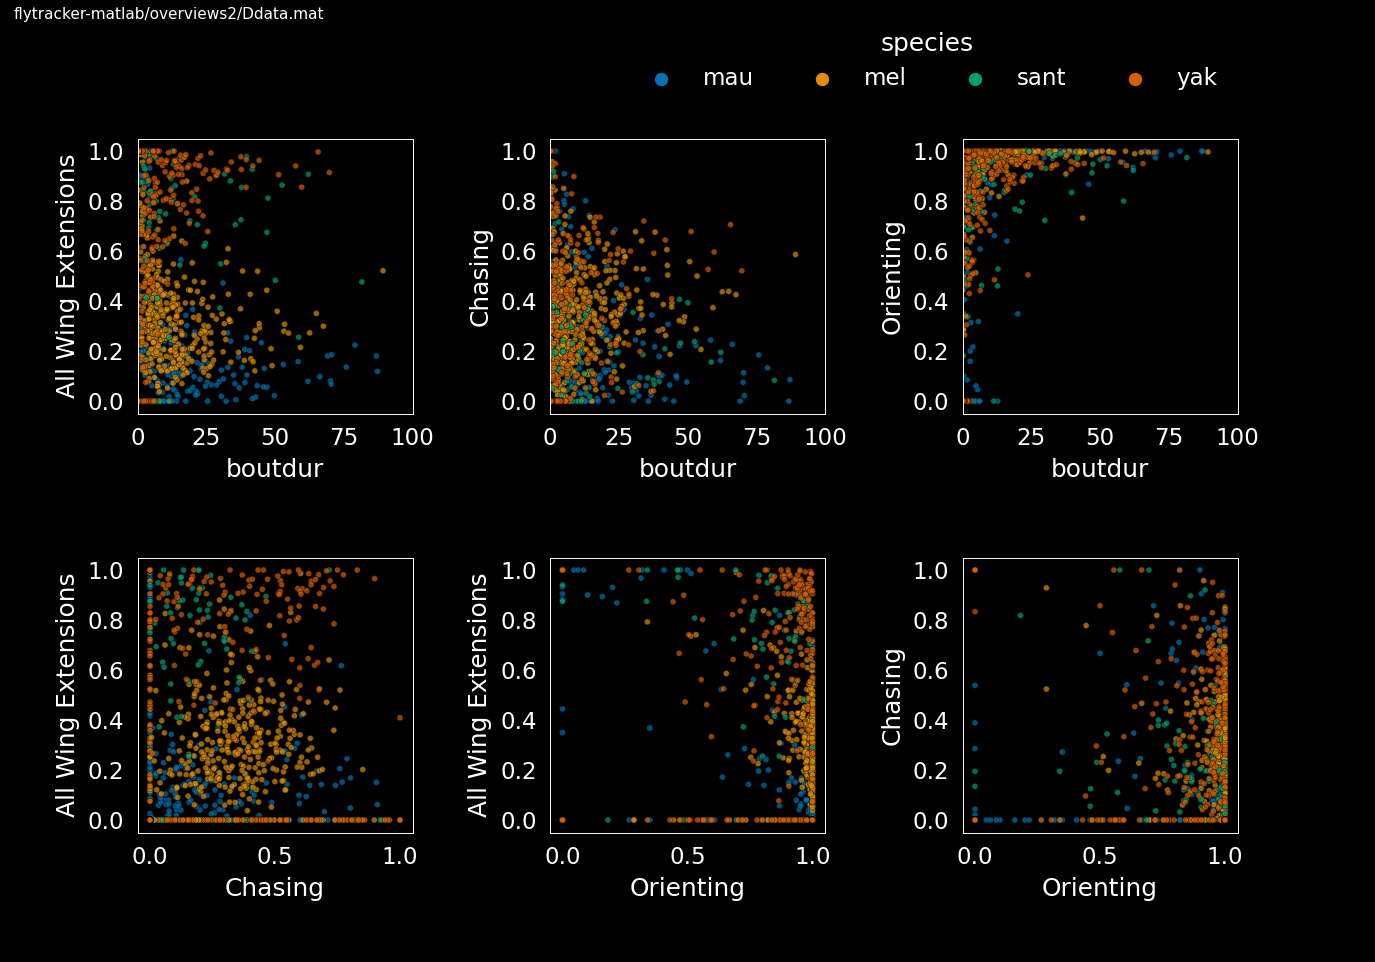

/mnt/minerva/analysis/FlyTracker/figures


In [498]:
plotdf = boutdurs[(boutdurs['Disengaged']==0) & (boutdurs['species'].isin(incl_species))].copy()

behavs2plot = ['All Wing Extensions', 'Chasing', 'Orienting'] #, 'Copulation Attempts', 'boutdur']
nc=3
nr=2
fig, axn = pl.subplots(nr, nc, figsize=(10, 7))
for ai, behav in enumerate(behavs2plot):
    ax=axn[0, ai]
    sns.scatterplot(data=plotdf[plotdf['species'].isin(incl_species)], 
               x='boutdur', y=behav, hue='species', ax=ax,
               alpha=0.7, s=10, edgecolor='k', legend=ai==(nc-1), palette=species_cmap)
    if ai==(nc-1):
        sns.move_legend(ax, loc='lower right', bbox_to_anchor=(1,1.1), 
                        ncol=plotdf['species'].nunique(), frameon=False)
    ax.set_box_aspect(1)
    ax.set_xlim([0, 100])
#     ax.set_xlim([0, 200])
#     ax.set_ylim([0, 5000])

ax=axn[1, 0]
sns.scatterplot(data=plotdf[plotdf['species'].isin(incl_species)], 
           y='All Wing Extensions', x='Chasing', hue='species', ax=ax,
           alpha=0.7, s=10, edgecolor='k', legend=0, palette=species_cmap)
# ax.set_xlim([0, 2000])
# ax.set_ylim([0, 4000])
ax.set_box_aspect(1)

ax=axn[1, 1]
sns.scatterplot(data=plotdf[plotdf['species'].isin(incl_species)], 
           y='All Wing Extensions', x='Orienting', hue='species', ax=ax,
           alpha=0.7, s=10, edgecolor='k', legend=0, palette=species_cmap)
# ax.set_xlim([0, 2000])
# ax.set_ylim([0, 2000])
ax.set_box_aspect(1)

ax=axn[1, 2]
sns.scatterplot(data=plotdf[plotdf['species'].isin(incl_species)], 
           y='Chasing', x='Orienting', hue='species', ax=ax,
           alpha=0.7, s=10, edgecolor='k', legend=0, palette=species_cmap)
# ax.set_xlim([0, 4000])
# ax.set_ylim([0, 4000])
ax.set_box_aspect(1)
#     ax.set_box_aspect(1)
#     ax.set_xlim([0, 200])
#     ax.set_ylim([0, 5000])
pl.subplots_adjust(wspace=0.5, hspace=0.3, right=0.9, left=0.1)


putil.label_figure(fig, figid)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname='mat_by-species_compare-behavs-boutdur_frac')))
print(destdir)

In [499]:
boutdurs.columns

Index(['species', 'acquisition', 'Disengaged', 'copulation', 'level_4',
       'boutnum', 'boutdur', 'All Wing Extensions', 'Putative Tap Events',
       'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting',
       'vel', 'ang_vel', 'mean_wing_length', 'axis_ratio', 'fg_body_ratio',
       'contrast', 'dist_to_wall', 'dist_to_other', 'leg_dist', 'level_3',
       'min_wing_ang', 'max_wing_ang', 'angle_between', 'facing_angle'],
      dtype='object')

<IPython.core.display.Javascript object>


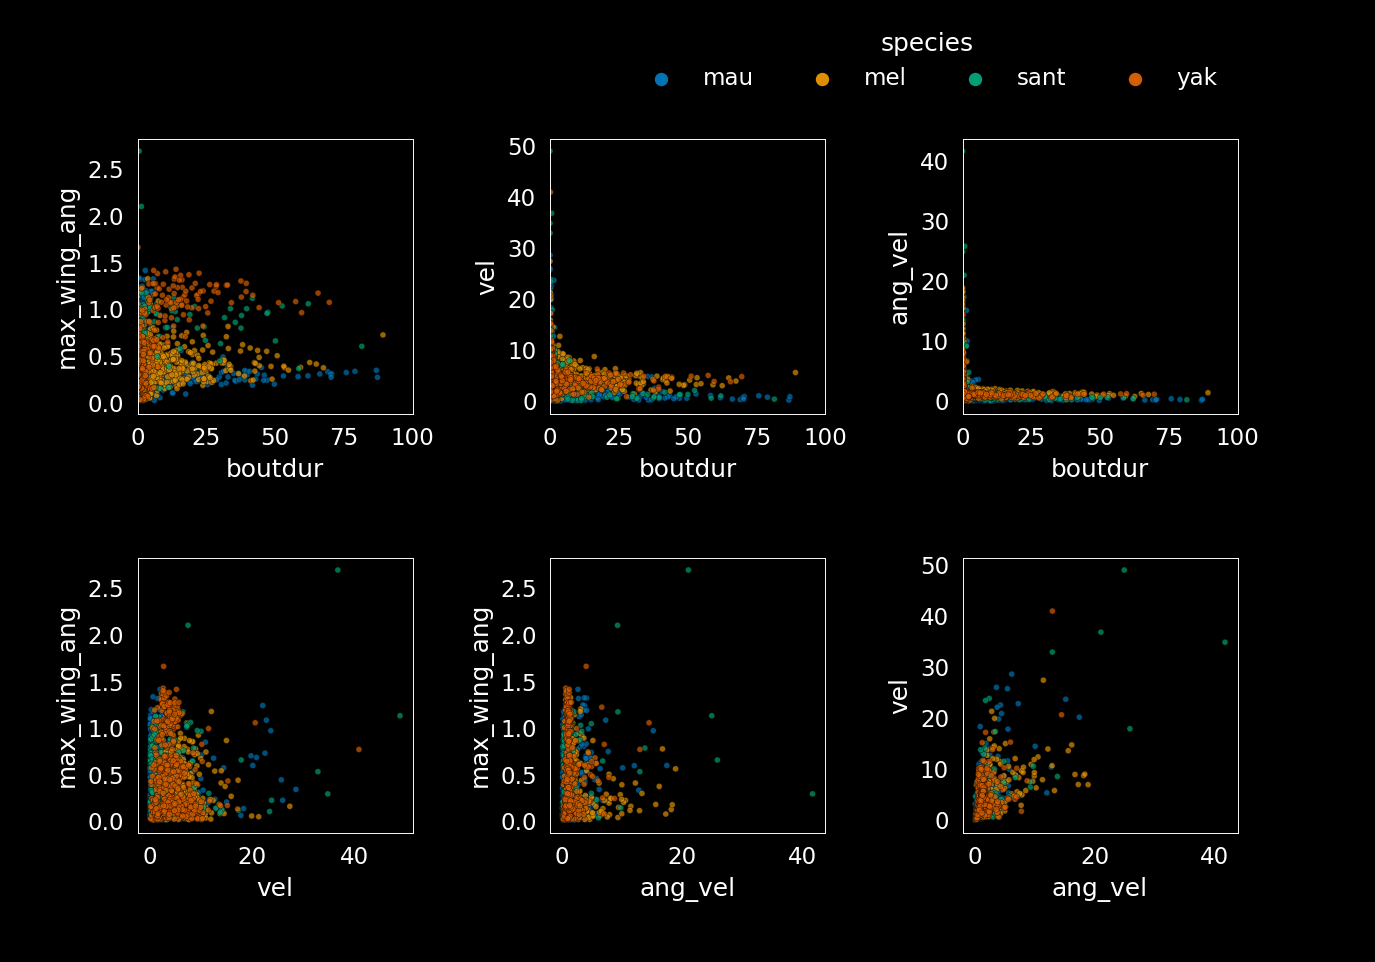

In [507]:
plotdf = boutdurs[(boutdurs['Disengaged']==0) & (boutdurs['species'].isin(incl_species))].copy()

behavs2plot = ['max_wing_ang', 'vel', 'ang_vel'] #, 'Copulation Attempts', 'boutdur']
nc=3
nr=2
fig, axn = pl.subplots(nr, nc, figsize=(10, 7))
for ai, behav in enumerate(behavs2plot):
    ax=axn[0, ai]
    sns.scatterplot(data=plotdf[plotdf['species'].isin(incl_species)], 
               x='boutdur', y=behav, hue='species', ax=ax,
               alpha=0.7, s=10, edgecolor='k', legend=ai==(nc-1), palette=species_cmap)
    if ai==(nc-1):
        sns.move_legend(ax, loc='lower right', bbox_to_anchor=(1,1.1), 
                        ncol=plotdf['species'].nunique(), frameon=False)
    ax.set_box_aspect(1)
    ax.set_xlim([0, 100])

ax=axn[1, 0]
sns.scatterplot(data=plotdf[plotdf['species'].isin(incl_species)], 
           y='max_wing_ang', x='vel', hue='species', ax=ax,
           alpha=0.7, s=10, edgecolor='k', legend=0, palette=species_cmap)
ax.set_box_aspect(1)

ax=axn[1, 1]
sns.scatterplot(data=plotdf[plotdf['species'].isin(incl_species)], 
           y='max_wing_ang', x='ang_vel', hue='species', ax=ax,
           alpha=0.7, s=10, edgecolor='k', legend=0, palette=species_cmap)
ax.set_box_aspect(1)

ax=axn[1, 2]
sns.scatterplot(data=plotdf[plotdf['species'].isin(incl_species)], 
           y='vel', x='ang_vel', hue='species', ax=ax,
           alpha=0.7, s=10, edgecolor='k', legend=0, palette=species_cmap)
ax.set_box_aspect(1)
pl.subplots_adjust(wspace=0.5, hspace=0.3, right=0.9, left=0.1)


In [509]:
spstats.circmean([0.16, 0.95], low=-np.pi, high=np.pi)


0.5549999999999993

In [511]:
spstats.circmean([np.rad2deg(0.16), np.rad2deg(0.95)], low=0, high=2*np.pi)

3.524823747452547

## behavior as fraction

<IPython.core.display.Javascript object>


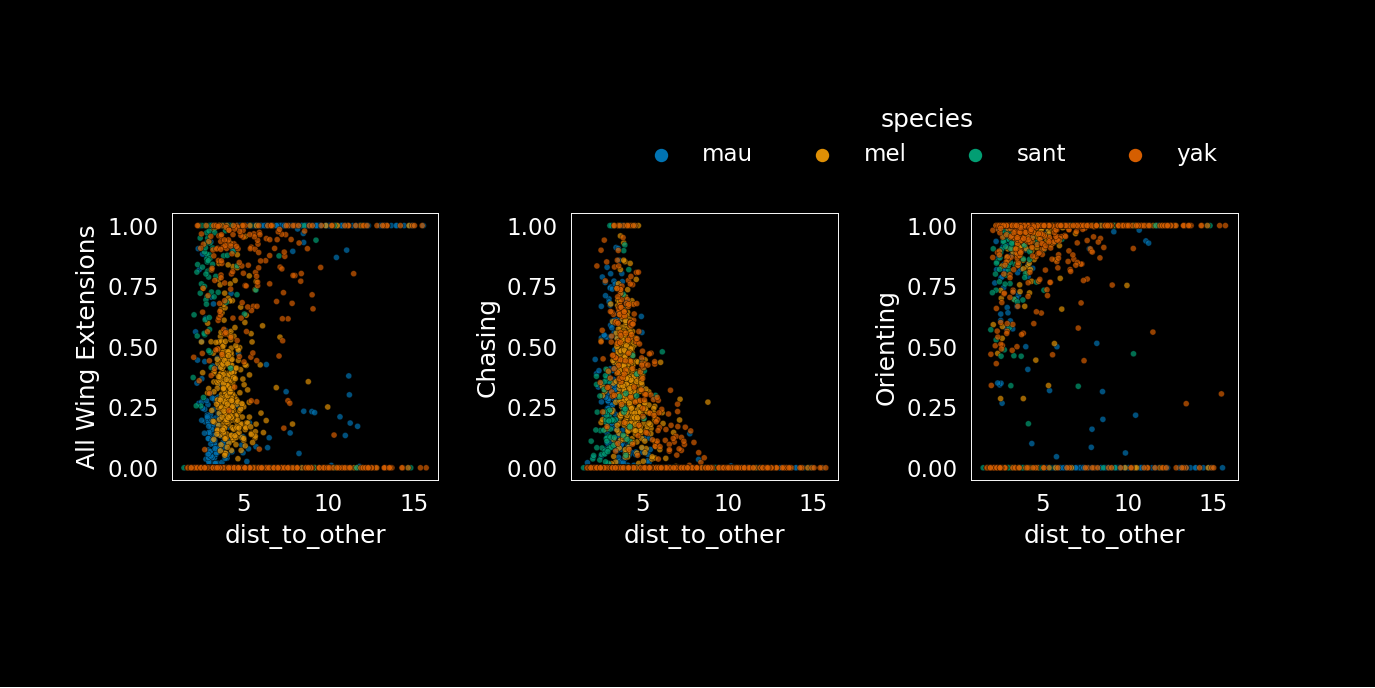

In [501]:
plotdf = boutdurs[(boutdurs['Disengaged']==0) & (boutdurs['species'].isin(incl_species))].copy()

behavs2plot = ['All Wing Extensions', 'Chasing', 'Orienting'] #, 'Copulation Attempts', 'boutdur']
nc=3
nr=1
fig, axn = pl.subplots(nr, nc, figsize=(10, 5))
for ai, behav in enumerate(behavs2plot):
    ax=axn[ai]
    sns.scatterplot(data=plotdf[plotdf['species'].isin(incl_species)], 
               x='dist_to_other', y=behav, hue='species', ax=ax,
               alpha=0.7, s=10, edgecolor='k', legend=ai==(nc-1), palette=species_cmap)
    if ai==(nc-1):
        sns.move_legend(ax, loc='lower right', bbox_to_anchor=(1,1.1), 
                        ncol=plotdf['species'].nunique(), frameon=False)
    ax.set_box_aspect(1)
#     ax.set_xlim([0, 200])
    #ax.set_ylim([0, 1000])
pl.subplots_adjust(wspace=0.5)

<IPython.core.display.Javascript object>


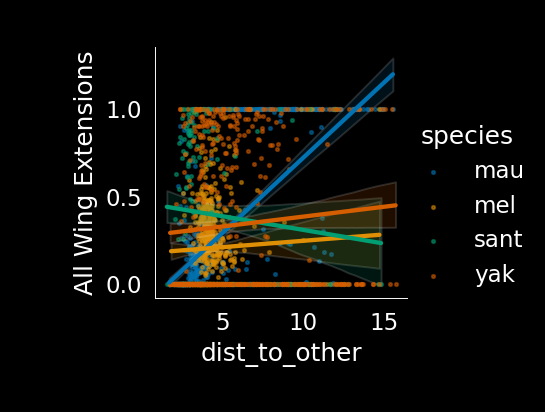

<IPython.core.display.Javascript object>


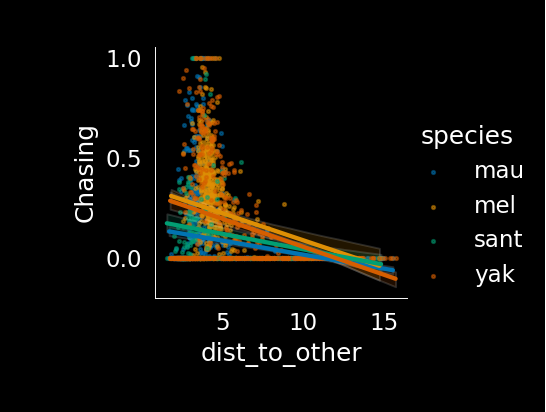

<IPython.core.display.Javascript object>


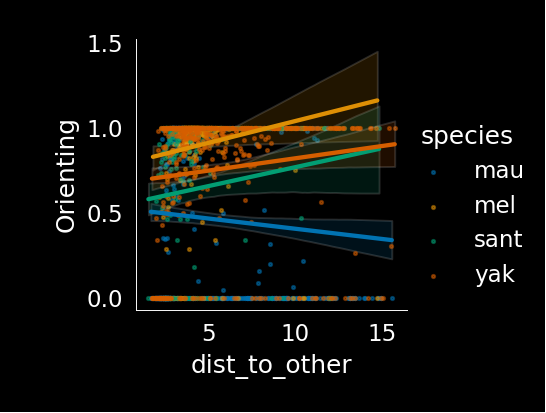

In [502]:
for behav in behavs2plot:
    fig = sns.lmplot(data=plotdf[plotdf['species'].isin(incl_species)], scatter=True, scatter_kws={'s':3, 'alpha':0.5},
                   x='dist_to_other', y=behav, hue='species', palette=species_cmap, height=3)
    #pl.ylim(0, 1000)
    fig.ax.set_box_aspect(1)

<IPython.core.display.Javascript object>


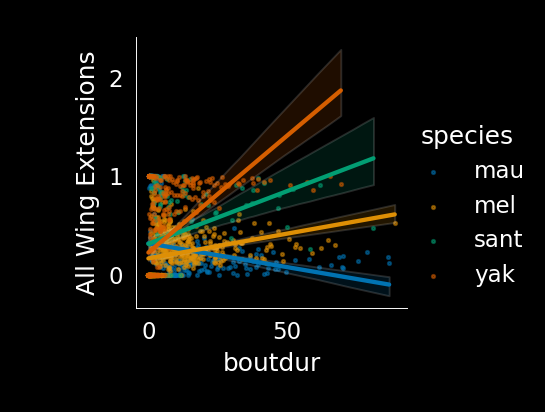

<IPython.core.display.Javascript object>


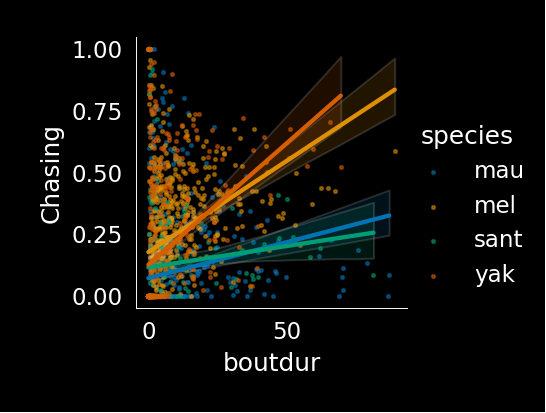

<IPython.core.display.Javascript object>


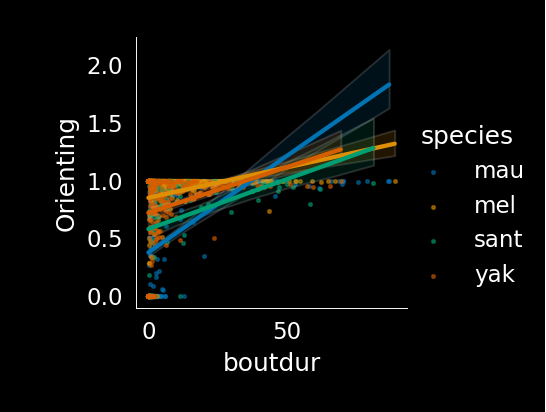

In [478]:
for behav in behavs2plot:
    fig = sns.lmplot(data=plotdf[(plotdf['species'].isin(incl_species)) & (plotdf['boutdur']<=100)], 
                     scatter=True, scatter_kws={'s':3, 'alpha':0.5},
                     x='boutdur', y=behav, hue='species', palette=species_cmap, height=3)
    #pl.ylim(0, 1000)
    fig.ax.set_box_aspect(1)

In [136]:
fig, ax = pl.subplots()
sns.scatterplot(data=plotdf, )

Disengaged  copulation     level_4     boutnum   boutdur
species                                                          
mau             0.0         1.0  116.088710  233.115591  4.340255
mel             0.0         1.0   31.595273   63.322009  7.858075
sant            0.0         1.0   24.361111   49.157407  4.577160
yak             0.0         1.0   47.500000   96.000000  9.653125

In [32]:
engaged = events[events['Disengaged']==0].copy()
engaged.groupby('species')['boutnum'].nunique()

species
mau     376
mel     178
rsim    281
sant    130
yak     251
Name: boutnum, dtype: int64

In [33]:
excl_cols = ['index', 'fpath', 'copulation_index', 'Copulation Start (s)']
incl_cols = [c for c in engaged.columns if c not in excl_cols]

#meltdf = engaged[(engaged['sex']=='m') & (engaged['copulation'])][incl_cols].melt()

meltdf = pd.melt(engaged[(engaged['sex']=='m') & (engaged['copulation'])][incl_cols], 
                 id_vars =['species', 'vel', 'leg_dist'], 
        value_vars =['All Wing Extensions', 'Putative Tap Events', 'Chasing',
       'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting',
       'Disengaged'])
meltdf.head()

species        vel  leg_dist             variable  value
0     mau   7.960493  2.146528  All Wing Extensions    0.0
1     mau   7.880615  1.975980  All Wing Extensions    0.0
2     mau   9.414805  1.703574  All Wing Extensions    0.0
3     mau  10.431489  1.571131  All Wing Extensions    0.0
4     mau  11.277124  1.541725  All Wing Extensions    0.0

In [375]:
# g = sns.FacetGrid(data=meltdf[meltdf['value']==1], col='species', row='variable')
# g.map_dataframe(sns.histplot, x='leg_dist', hue='vel', stat='probability', common_norm=False, )

<IPython.core.display.Javascript object>


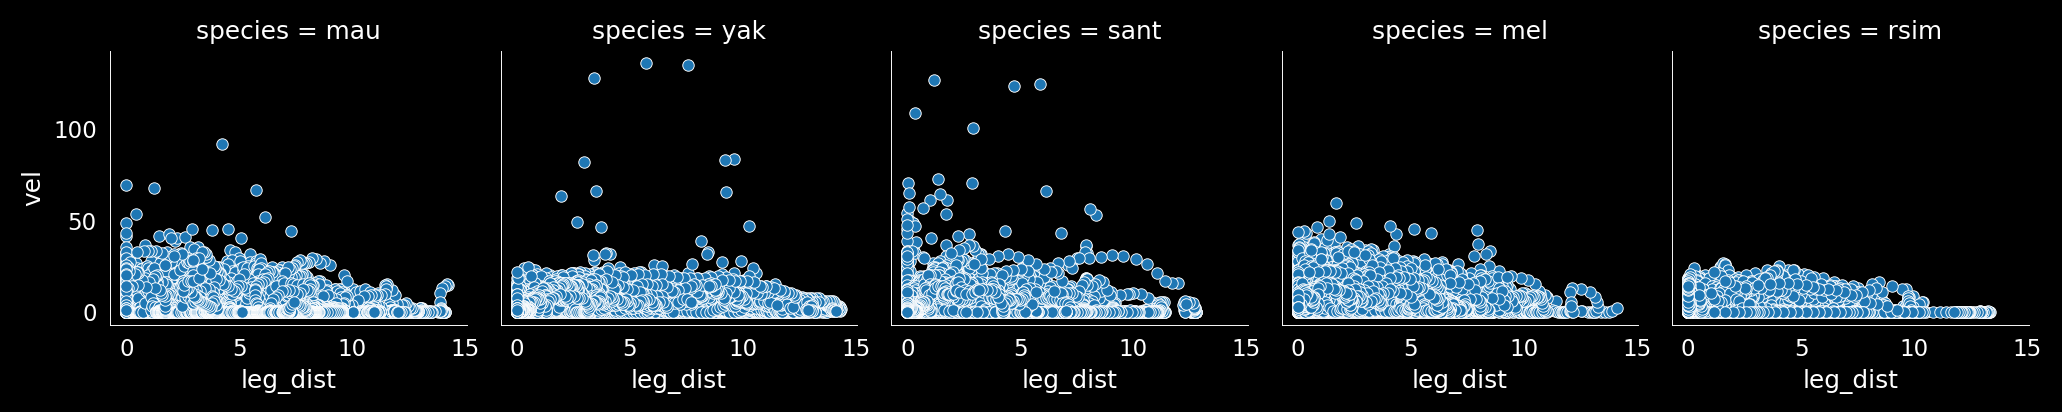

In [376]:
g = sns.FacetGrid(data=engaged, col='species')
g.map(sns.scatterplot, 'leg_dist', 'vel')
# sns.scatterplot(x='leg_dist', y='dist_to_other', data=evs, color=bg_color, lw=0.5)
# ax.set_aspect('equal')
# ax.plot([0, ax.get_xlim()[-1]], [0, ax.get_ylim()[-1]])

In [377]:
for sp, evs in engaged.groupby('species'):
    #evs = engaged[engaged['species']=='mauR'].copy()
    nc = evs['acquisition'].nunique()    
    fig, axn = pl.subplots(nr, nc, sharex=True, sharey=True)
    for ai, (acq, ev_) in enumerate(evs.groupby('acquisition')):
        ax=axn[ai] if nc>1 else axn
        sns.histplot(data=ev_, x='dist_to_other', hue='All Wing Extensions', ax=ax, 
                 cumulative=True, common_norm=False, stat='probability', element='step')
        if ai!=nc-1:
            ax.legend_.remove()
        else:
            sns.move_legend(ax, loc='lower right', bbox_to_anchor=(1,1))
        ax.set_box_aspect(1)
    fig.suptitle(sp)

NameError: name 'nr' is not defined

In [195]:
plot_behaviors = [
    'Orienting',  'Putative Tap Events', 'Chasing', 'Unilateral Wing Extensions',  'Licking/Proboscis Ext', 'Copulation Attempts'
]

nonbinary_behavs = ['leg_dist', 'vel', 'facing_angle']
behavior_colors = sns.color_palette('cubehelix', n_colors=len(plot_behaviors))

In [196]:
# evplot=[]
# for behav in plot_behaviors:
#     evplot.append(evs[behav])
# evplot = np.array(evplot)
bg_color=[.75]*3
behavior_colors = sns.color_palette('cubehelix', n_colors=len(plot_behaviors))

In [197]:
destdir

'/Volumes/Julie/analysis/FlyTracker/figures'

In [199]:
# fig, ax = pl.subplots()
# sns.stripplot()
bouts.groupby(['species'])['Copulation Attempts'].describe()

count      mean       std  min  25%  50%  75%  max
species                                                     
mau      1481.0  0.005534  0.060107  0.0  0.0  0.0  0.0  1.0
mel      1218.0  0.002330  0.021619  0.0  0.0  0.0  0.0  0.6
sant      346.0  0.010299  0.093866  0.0  0.0  0.0  0.0  1.0
yak       968.0  0.001252  0.032429  0.0  0.0  0.0  0.0  1.0

In [447]:
bouts['Copulation Attempts_log'] = np.log2(bouts['Copulation Attempts'])
bouts['Copulation Attempts_log'].replace([np.inf, -np.inf], np.nan, inplace=True)


/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


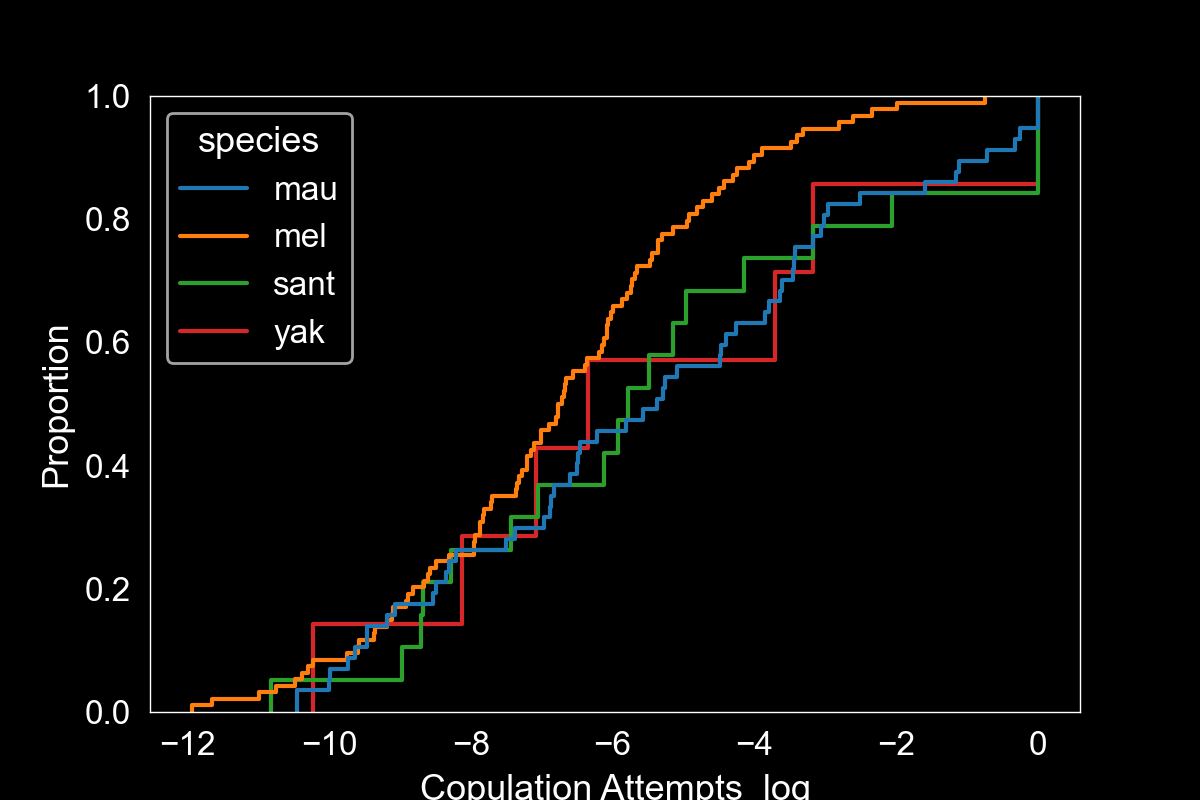

<AxesSubplot: xlabel='Copulation Attempts_log', ylabel='Proportion'>

In [448]:
fig, ax = pl.subplots()
#sns.stripplot(data=bouts, x='species', y='Copulation Attempts')
sns.ecdfplot(data=bouts, x='Copulation Attempts_log', hue='species')

In [466]:
plotdf = bouts[bouts['species'].isin(curr_species)].copy()

In [467]:
plotdf[plot_behaviors]>0 #.sum(axis=1).max()

Orienting  Putative Tap Events  Chasing  Unilateral Wing Extensions  \
0         False                False    False                        True   
1         False                False    False                        True   
2          True                False    False                       False   
3         False                 True    False                       False   
4         False                 True    False                       False   
...         ...                  ...      ...                         ...   
4571      False                False    False                       False   
4572      False                False    False                       False   
4573      False                False    False                       False   
4574      False                False    False                       False   
4575      False                False    False                       False   

      Licking/Proboscis Ext  Copulation Attempts  
0                     False                False  
1                     False                False  
2                     False                False  
3                     False                False  
4                     False                False  
...                     ...                  ...  
4571                  False                False  
4572                  False                False  
4573                  False                False  
4574                  False                False  
4575                  False                False  

[4013 rows x 6 columns]

In [472]:
#several_behavs = plotdf[plotdf[behavior_names].sum(axis=1)>=2].index
several_behavs = plotdf[plotdf[plot_behaviors].sum(axis=1)>=2].index

<IPython.core.display.Javascript object>


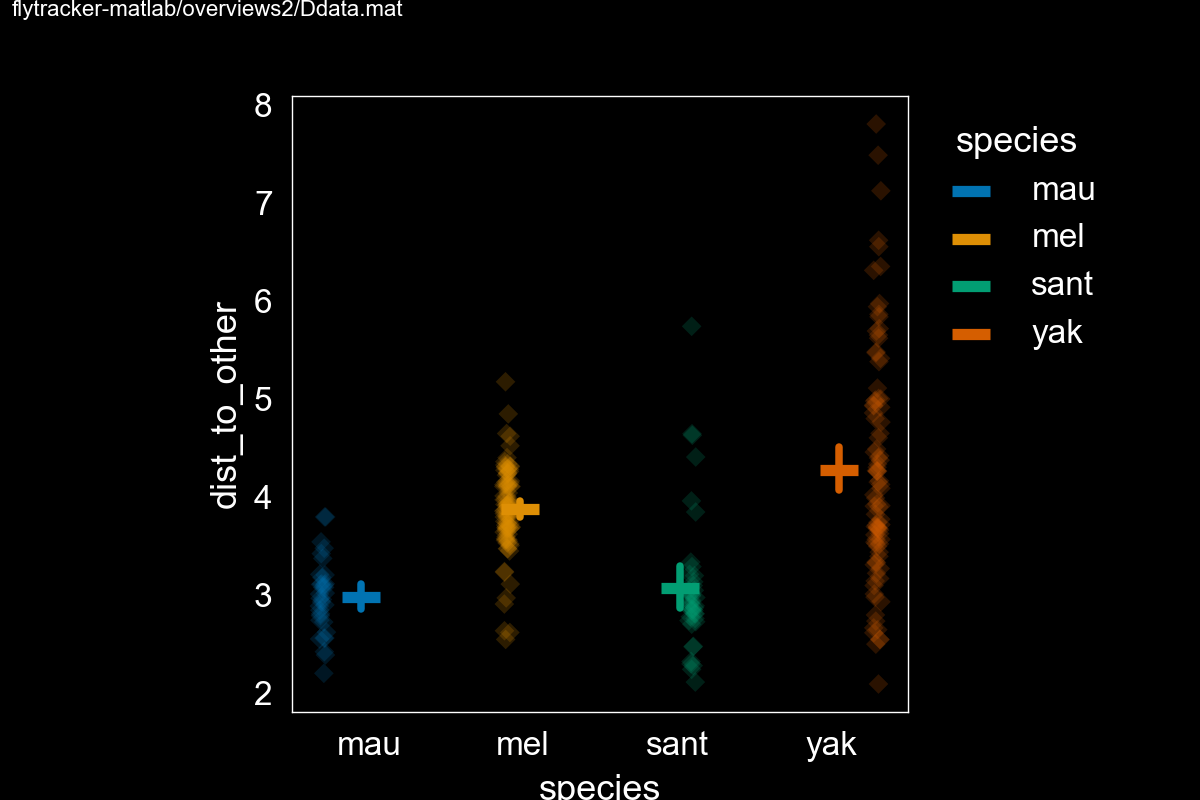

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to s

mat-strip_several-behavs_dist_to_other
/Volumes/Julie/analysis/FlyTracker/figures


In [474]:
several_behavs = plotdf[plotdf[plot_behaviors].sum(axis=1)>=2].index
yvar='dist_to_other'
fig, ax = pl.subplots()
sns.stripplot(data=plotdf.loc[several_behavs], x='species', y=yvar,
              hue='species', palette=species_palette, legend=0, dodge=True,
              marker="D", alpha=0.2, s=5)
sns.pointplot(data=plotdf.loc[several_behavs], x='species', y=yvar,
              hue='species', palette=species_palette, dodge=True,
              markers='_', scale=2)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_box_aspect(1)

pl.subplots_adjust(left=0.1, right=0.9)
putil.label_figure(fig, figid)
figname='mat-strip_several-behavs_{}'.format(yvar)
print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
print(destdir)

In [475]:
plotdf.loc[several_behavs].groupby('species')['max_wing_ang'].describe()

count      mean       std       min       25%       50%       75%  \
species                                                                      
mau       34.0  0.349778  0.176031  0.099105  0.233867  0.323254  0.437688   
mel       97.0  0.555091  0.174893  0.055922  0.448233  0.542287  0.704639   
sant      43.0  0.910418  0.210745  0.124849  0.805657  0.977554  1.033406   
yak       94.0  1.008995  0.274710  0.100052  0.914447  1.073798  1.188414   

              max  
species            
mau      0.865276  
mel      0.945123  
sant     1.177203  
yak      1.430077

<IPython.core.display.Javascript object>


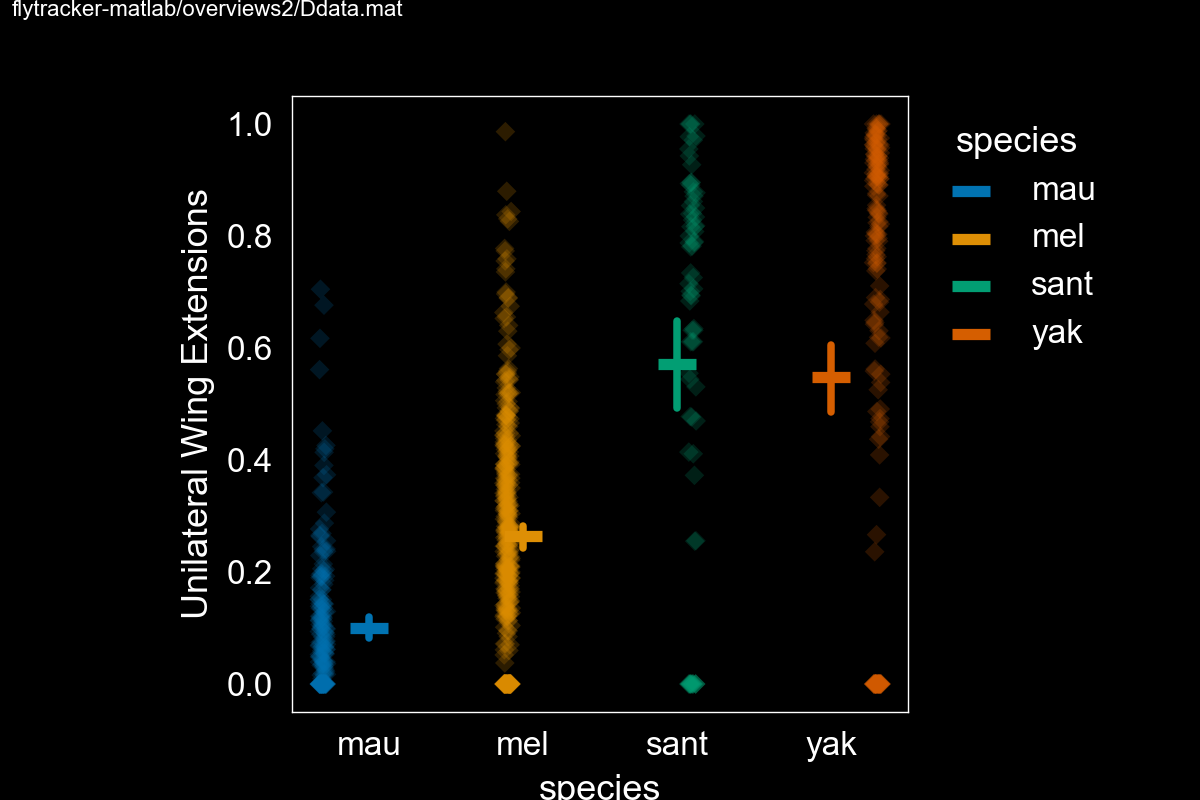

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to s

mat-strip_uwe-when-chasing
/Volumes/Julie/analysis/FlyTracker/figures


In [477]:
fig, ax = pl.subplots()
sns.stripplot(data=plotdf[plotdf['Chasing']>0], 
              x='species', y='Unilateral Wing Extensions',
              hue='species', palette=species_palette, dodge=True, legend=0,
              marker="D", alpha=0.2, s=5)
sns.pointplot(data=plotdf[plotdf['Chasing']>0], 
              x='species', y='Unilateral Wing Extensions', 
              hue='species', palette=species_palette, join=False,
             markers='_', scale=2)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_box_aspect(1)
pl.subplots_adjust(left=0.1, right=0.9)

putil.label_figure(fig, figid)
figname='mat-strip_{}'.format('uwe-when-chasing')
print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
print(destdir)

<IPython.core.display.Javascript object>


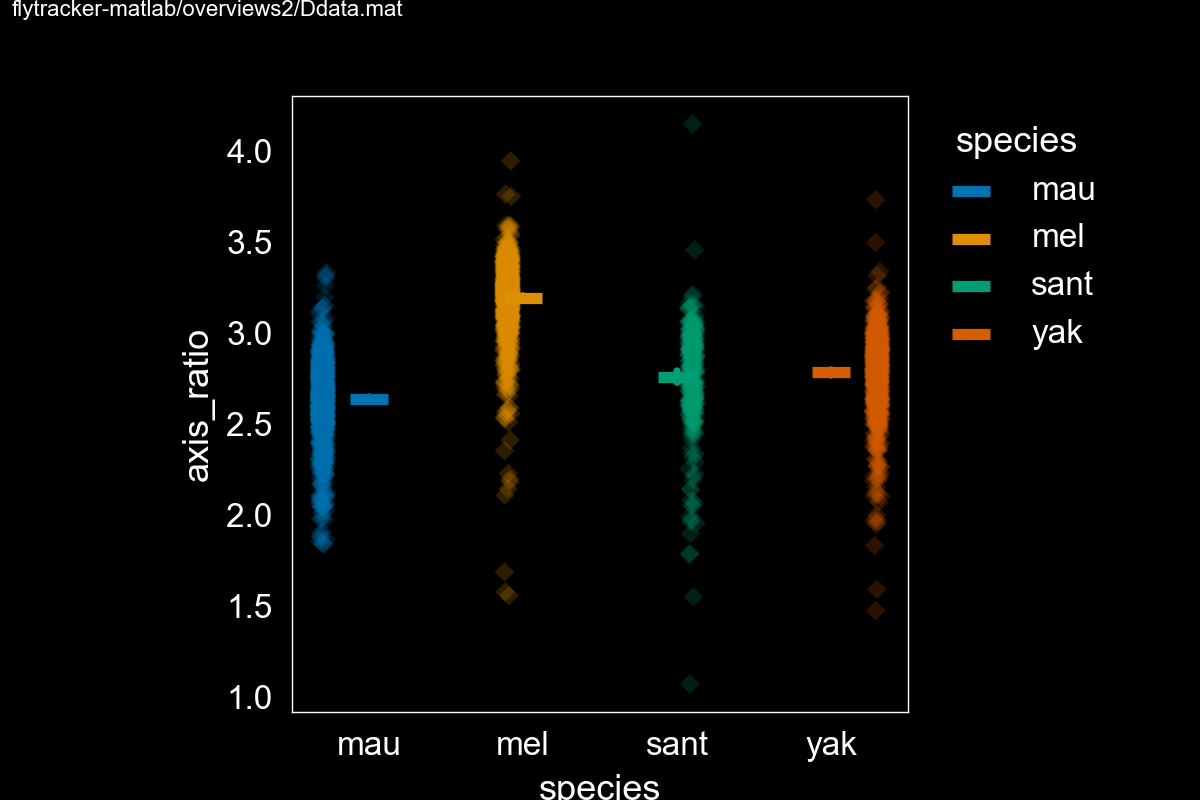

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to s

mat-strip_axis_ratio
/Volumes/Julie/analysis/FlyTracker/figures


In [478]:
yvar = 'axis_ratio' #'boutdur_log'
fig, ax = pl.subplots()
sns.stripplot(data=plotdf,
              x='species', y=yvar,
              hue='species', palette=species_palette, dodge=True, legend=0,
              marker="D", alpha=0.2, s=5)
sns.pointplot(data=plotdf,
              x='species', y=yvar, 
              hue='species', palette=species_palette, join=False,
             markers='_', scale=2)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_box_aspect(1)
pl.subplots_adjust(left=0.1, right=0.9)

putil.label_figure(fig, figid)
figname='mat-strip_{}'.format(yvar)
print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
print(destdir)

In [479]:
n_attempts = events\
                .groupby(['species', 'acquisition', 'boutnum', 'Disengaged'])['Copulation Attempts']\
                .mean().reset_index()
n_attempts['Copulation Attempts_log'] = np.log10(n_attempts['Copulation Attempts'])
n_attempts['Copulation Attempts_log'].replace([np.inf, -np.inf], np.nan, inplace=True)

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


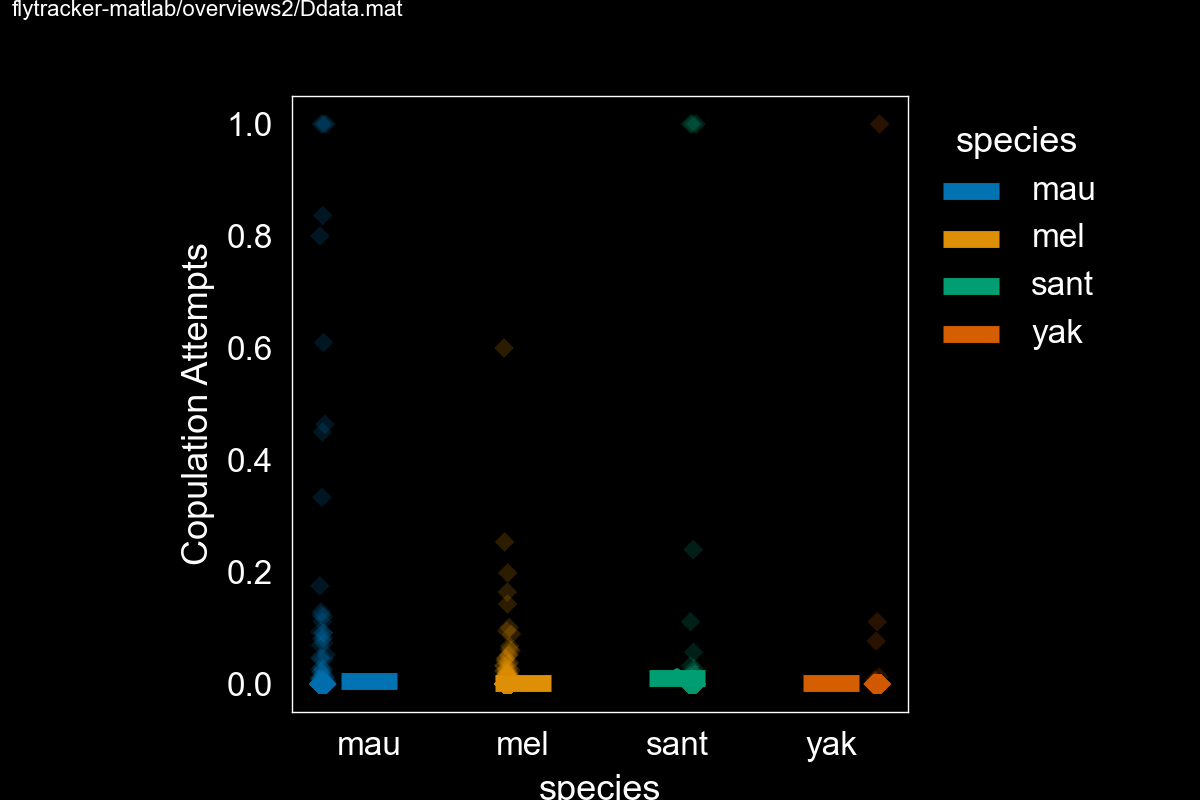

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to s

mat-strip_Copulation Attempts
/Volumes/Julie/analysis/FlyTracker/figures


In [481]:
yvar = 'Copulation Attempts' #'boutdur_log'
fig, ax = pl.subplots()
plotdf = n_attempts #[n_attempts['Copulation Attempts']<=200]
sns.stripplot(data=plotdf,
              x='species', y=yvar,
              hue='species', palette=species_palette, dodge=True, legend=0,
              marker="D", alpha=0.2, s=5)
sns.pointplot(data=plotdf,
              x='species', y=yvar, 
              hue='species', palette=species_palette, join=False,
             markers='_', scale=3)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_box_aspect(1)
pl.subplots_adjust(left=0.1, right=0.9)

putil.label_figure(fig, figid)
figname='mat-strip_{}'.format(yvar)
print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
print(destdir)

In [ ]:
yvar = 'axis_ratio' #'boutdur_log'
fig, ax = pl.subplots()
sns.stripplot(data=plotdf,
              x='species', y=yvar,
              hue='species', palette=species_palette, dodge=True, legend=0,
              marker="D", alpha=0.2, s=5)
sns.pointplot(data=plotdf,
              x='species', y=yvar, 
              hue='species', palette=species_palette, join=False,
             markers='_', scale=2)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_box_aspect(1)
pl.subplots_adjust(left=0.1, right=0.9)

putil.label_figure(fig, figid)
figname='mat-strip_several-behavs_{}'.format(yvar)
print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
print(destdir)

<IPython.core.display.Javascript object>


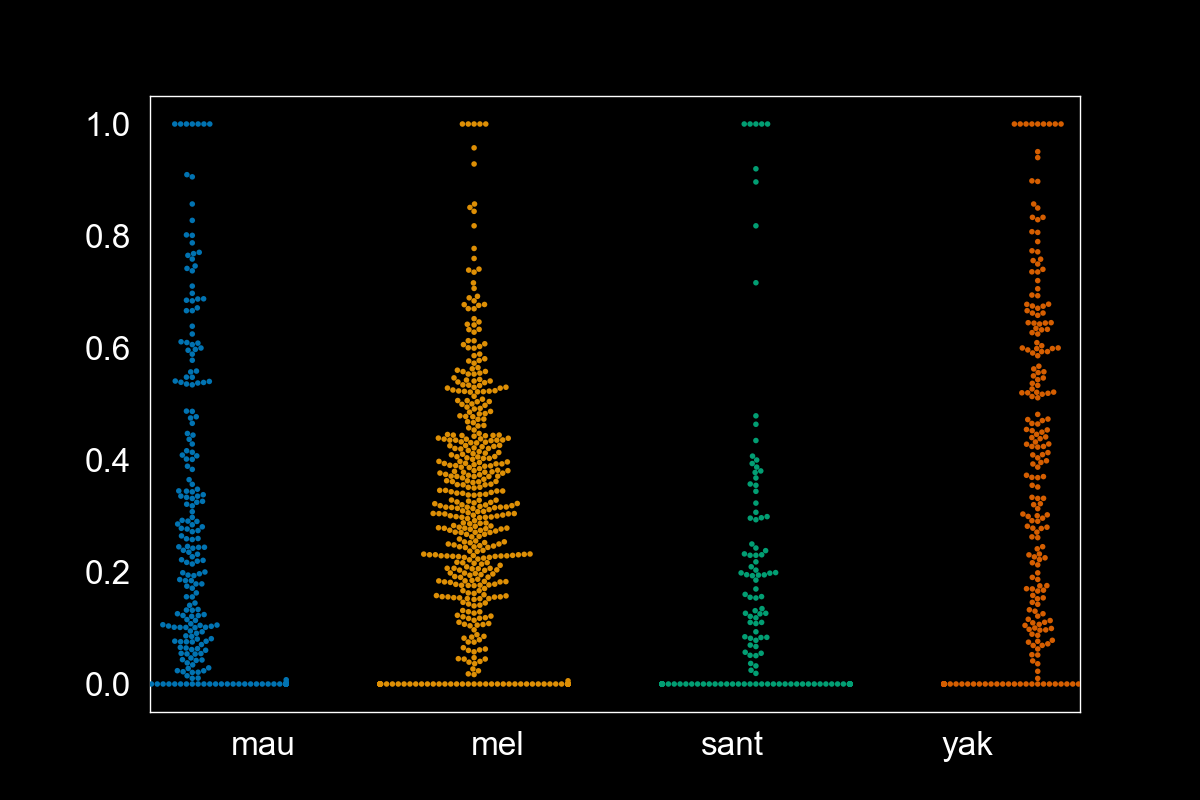


KeyboardInterrupt



In [232]:
fig, ax = pl.subplots()
# sns.pointplot(data=plotdf, x='species', y='Chasing', 
#               hue='species', palette=species_palette, dodge=True,
#               markers='_', scale=2)
sns.swarmplot(data=plotdf, x='species', y='Chasing',
              hue='species', palette=species_palette, dodge=True, s=2)

# plotdf.groupby('species')['max_wing_ang'].describe()

In [166]:
boutdurs.groupby('species')['vel'].describe()

count      mean       std       min       25%       50%       75%  \
species                                                                       
mau      1481.0  3.211351  4.123149  0.010269  0.482608  1.845478  4.235976   
mel      1218.0  5.142300  4.306101  0.142845  2.329012  4.028947  6.456346   
rsim      563.0  5.731211  3.894763  0.039750  2.676517  5.250105  8.578929   
sant      346.0  4.799635  7.838039  0.012831  0.504419  1.825561  5.596272   
yak       968.0  4.333663  3.098032  0.089558  2.232899  3.802941  5.603274   

               max  
species             
mau      29.439441  
mel      42.876559  
rsim     21.228531  
sant     53.170657  
yak      40.892618

In [304]:
DF0 = bouts[(bouts['Disengaged']==0) 
           & (bouts['species'].isin(curr_species))].copy()

several_behavs = DF0[DF0[plot_behaviors].sum(axis=1)>=0].index
DF = DF0.loc[several_behavs]

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_70338/675525615.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig ,axn =pl.subplots(1, 4, figsize=(9,4), sharex=True, sharey=True)


<IPython.core.display.Javascript object>


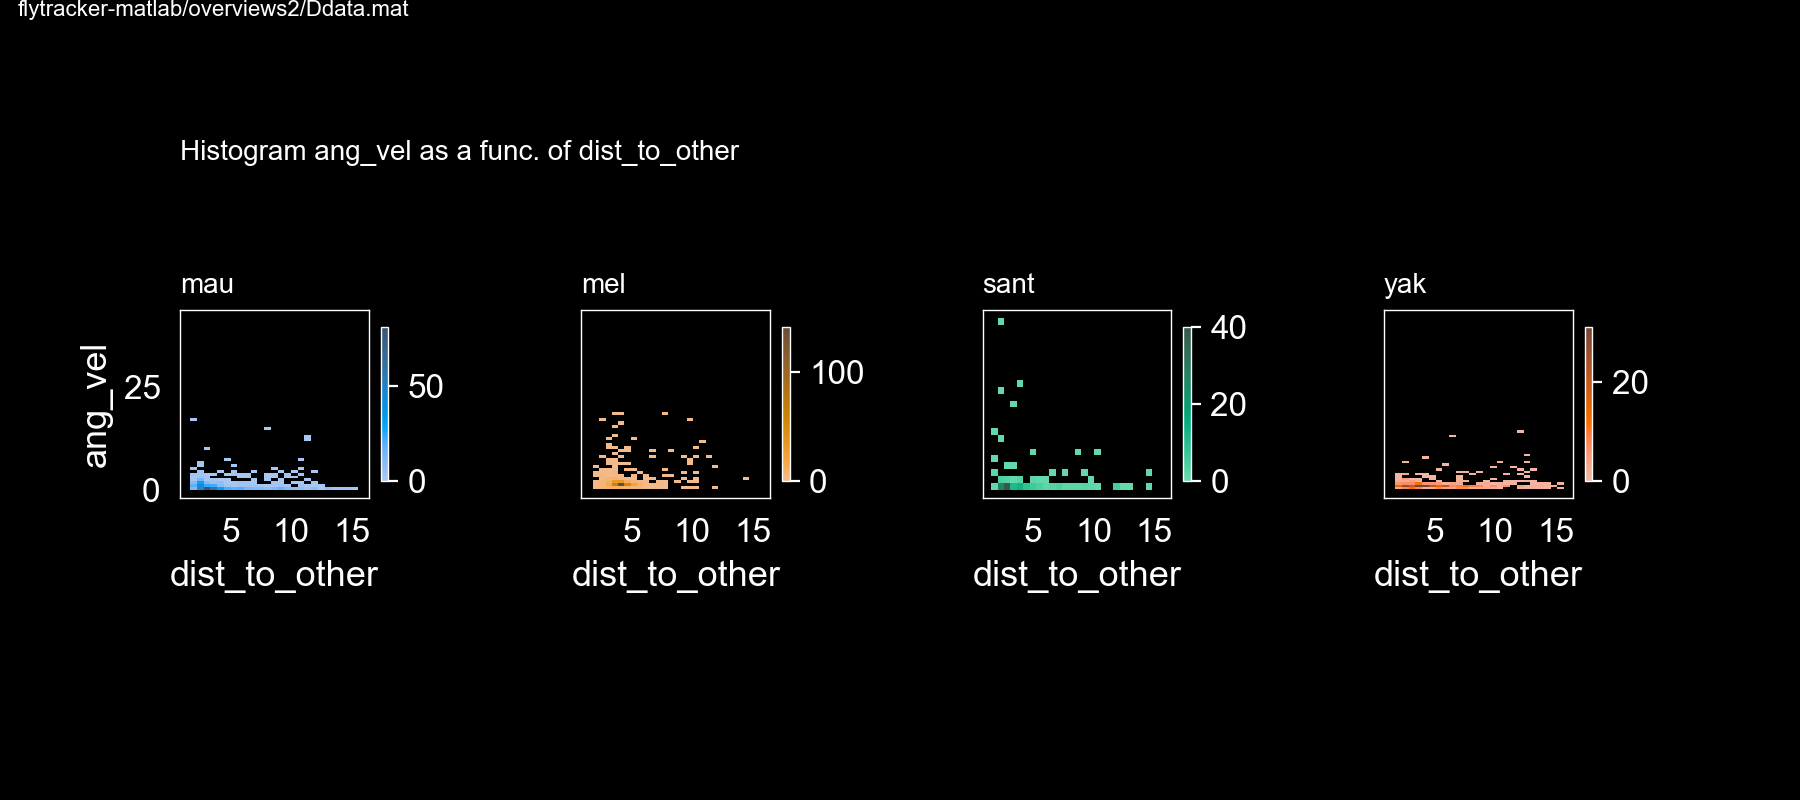

mat-hist_dist_to_other-v-ang_vel
/Volumes/Julie/analysis/FlyTracker/figures


In [415]:
xvar = 'dist_to_other'
yvar = 'ang_vel'
figtitle = 'Histogram {} as a func. of {}'.format(yvar, xvar)

fig ,axn =pl.subplots(1, 4, figsize=(9,4), sharex=True, sharey=True)

for ai, (sp, df_) in enumerate(DF.groupby('species')):
    ax=axn[ai]
    sns.histplot(data=df_[df_[yvar]>=0], x=xvar, y=yvar, ax=ax,
                  color=species_palette[sp], bins=25, 
                 discrete=(False, False), #log_scale=(False, True),
                 cbar=True, cbar_kws=dict(shrink=.25))
    ax.set_title(sp, loc='left', fontsize=10)
    ax.set_box_aspect(1)
pl.subplots_adjust(left=0.1, right=0.9, wspace=0.7)
fig.text(0.1, 0.8, figtitle)

putil.label_figure(fig, figid)
figname='mat-hist_{}-v-{}'.format(xvar, yvar)
print(figname)
pl.savefig(os.path.join(destdir, '{figname}.png'.format(figname=figname)))
print(destdir)

In [86]:
engaged[engaged['copulation']].groupby(['species'])['Copulation Attempts'].describe()

count      mean       std  min  25%  50%  75%  max
species                                                       
mau       76483.0  0.011820  0.108074  0.0  0.0  0.0  0.0  1.0
mel      314930.0  0.006268  0.078923  0.0  0.0  0.0  0.0  1.0
sant      30255.0  0.006974  0.083220  0.0  0.0  0.0  0.0  1.0
yak       56340.0  0.000834  0.028871  0.0  0.0  0.0  0.0  1.0

<IPython.core.display.Javascript object>


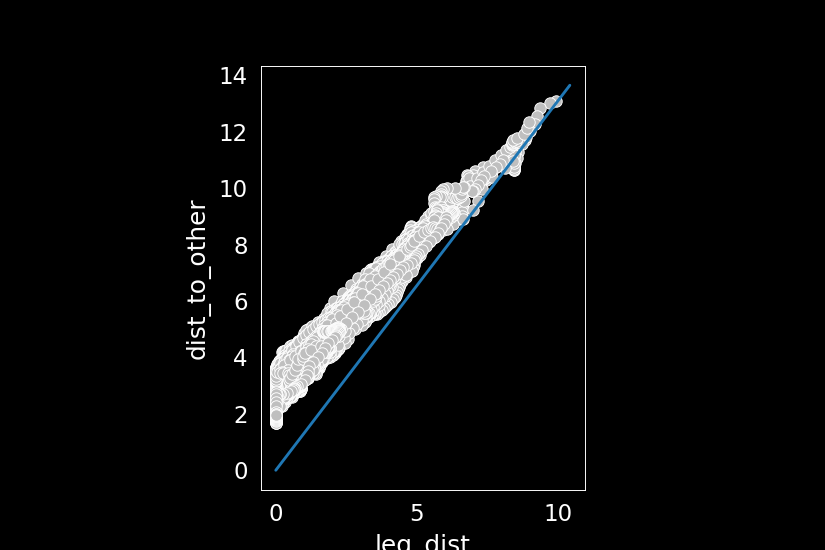

In [960]:
fig, ax = pl.subplots()
sns.scatterplot(x='leg_dist', y='dist_to_other', data=evs, color=bg_color, lw=0.5)
ax.set_aspect('equal')
ax.plot([0, ax.get_xlim()[-1]], [0, ax.get_ylim()[-1]])

## formatting

In [801]:
#rl_vids = glob.glob(os.path.join(rootdir, assay, 'MF_*'))
rl_vids = glob.glob(os.path.join(rootdir, assay, '*MF*', '20*'))


for fpath in rl_vids:
    parentdir0, fname = os.path.split(fpath)

    parentdir, subdir = os.path.split(parentdir0)

    os.rename(parentdir0, os.path.join(parentdir, fname))
    
    print(os.path.join(parentdir, fname, fname))

/mnt/sda/Videos/single_20mm_1x1/20220525_Canton-S_m_age5_sh_f_age4_gh_2/20220525_Canton-S_m_age5_sh_f_age4_gh_2
/mnt/sda/Videos/single_20mm_1x1/20220525_Canton-S_m_age5_sh_f_age4_gh_4/20220525_Canton-S_m_age5_sh_f_age4_gh_4
/mnt/sda/Videos/single_20mm_1x1/20220301_Canton-S_age5_m_sh_f_gh_4/20220301_Canton-S_age5_m_sh_f_gh_4
/mnt/sda/Videos/single_20mm_1x1/20220303_Canton-S_age4_m_sh_f_gh_7/20220303_Canton-S_age4_m_sh_f_gh_7
/mnt/sda/Videos/single_20mm_1x1/20220301_Canton-S_age5_m_sh_f_gh_1/20220301_Canton-S_age5_m_sh_f_gh_1
/mnt/sda/Videos/single_20mm_1x1/20220530_Canton-S_age5_m_sh_f_gh_1/20220530_Canton-S_age5_m_sh_f_gh_1
/mnt/sda/Videos/single_20mm_1x1/20220307_Canton-S_age5_2/20220307_Canton-S_age5_2
/mnt/sda/Videos/single_20mm_1x1/20220301_Canton-S_age5_m_sh_f_gh_6/20220301_Canton-S_age5_m_sh_f_gh_6
/mnt/sda/Videos/single_20mm_1x1/20220307_Canton-S_age_m_sh_5_f_gh_4_6/20220307_Canton-S_age_m_sh_5_f_gh_4_6
/mnt/sda/Videos/single_20mm_1x1/20220525_Canton-S_m_age5_sh_f_age4_gh_5/2022

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/sda/Videos/single_20mm_1x1/20220525_MF_5' -> '/mnt/sda/Videos/single_20mm_1x1/20220525_Canton-S_m_age5_sh_f_age4_gh_5.avi'

In [800]:
parentdir0

'/mnt/sda/Videos/single_20mm_1x1/20220525_MF_2'

In [780]:
from datetime import datetime

In [798]:
fpath = '/mnt/sda/Videos/single_20mm_1x1/20220525_MF_2/20220525_Canton-S_m_age5_sh_f_age4_gh_2'
parentdir0, fname = os.path.split(fpath)

parentdir, subdir = os.path.split(parentdir0)

print(os.path.join(parentdir, fname, fname))


# dt = fname.split('_')[0]
# dtobj = datetime.strptime(dt,'%m%d%y')
# new_fmt = dtobj.strftime('%Y%m%d')
# str_pts = [new_fmt]
# str_pts.extend(fname.split('_')[1:])
# print('_'.join(str_pts))


/mnt/sda/Videos/single_20mm_1x1/20220525_Canton-S_m_age5_sh_f_age4_gh_2/20220525_Canton-S_m_age5_sh_f_age4_gh_2
